# ADS 505: Final Project - Predicting Healthcare Cross-Selling
### Context: 
Our client is an Insurance company that has provided Health Insurance to its customers.  This client wants to build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
### Purpose: 
Predict Health Insurance Owners' who will be interested in Vehicle Insurance<br><p>
### Project Team Members (Team 6):
Minsu Kim<br>
Abanather Negusu<br>
Connie Chow<br>
### Table of Contents:
1. Data Setup
2. Exploratory Data Analysis
3. Feature Engineering
4. Model Selection
5. Conclusion
5. Next Steps/Recommendations

# 1. Data Setup

#### Import Required Libraries and Packages

In [98]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline
%config InlineBackend.figure_format='retina'
from datetime import datetime
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

#### Load Training and Test Datasets

In [99]:
train_df = pd.read_csv('https://raw.githubusercontent.com/connie-chow/datasets/main/train.csv', sep=',')
test_df = pd.read_csv('https://raw.githubusercontent.com/connie-chow/datasets/main/test.csv', sep=',')

#### Initial Data Summary

In [100]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [101]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [102]:
train_df.shape

(381109, 12)

In [103]:
print(train_df.dtypes)

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [104]:
print(train_df.head(5))

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


#### Handle Missing Values

In [105]:
# Checking for missing values
train_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Descriptive Statistics

In [106]:
#Summary Statistic
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# 2. Exploratory Data Analysis

Check distribution of data per column

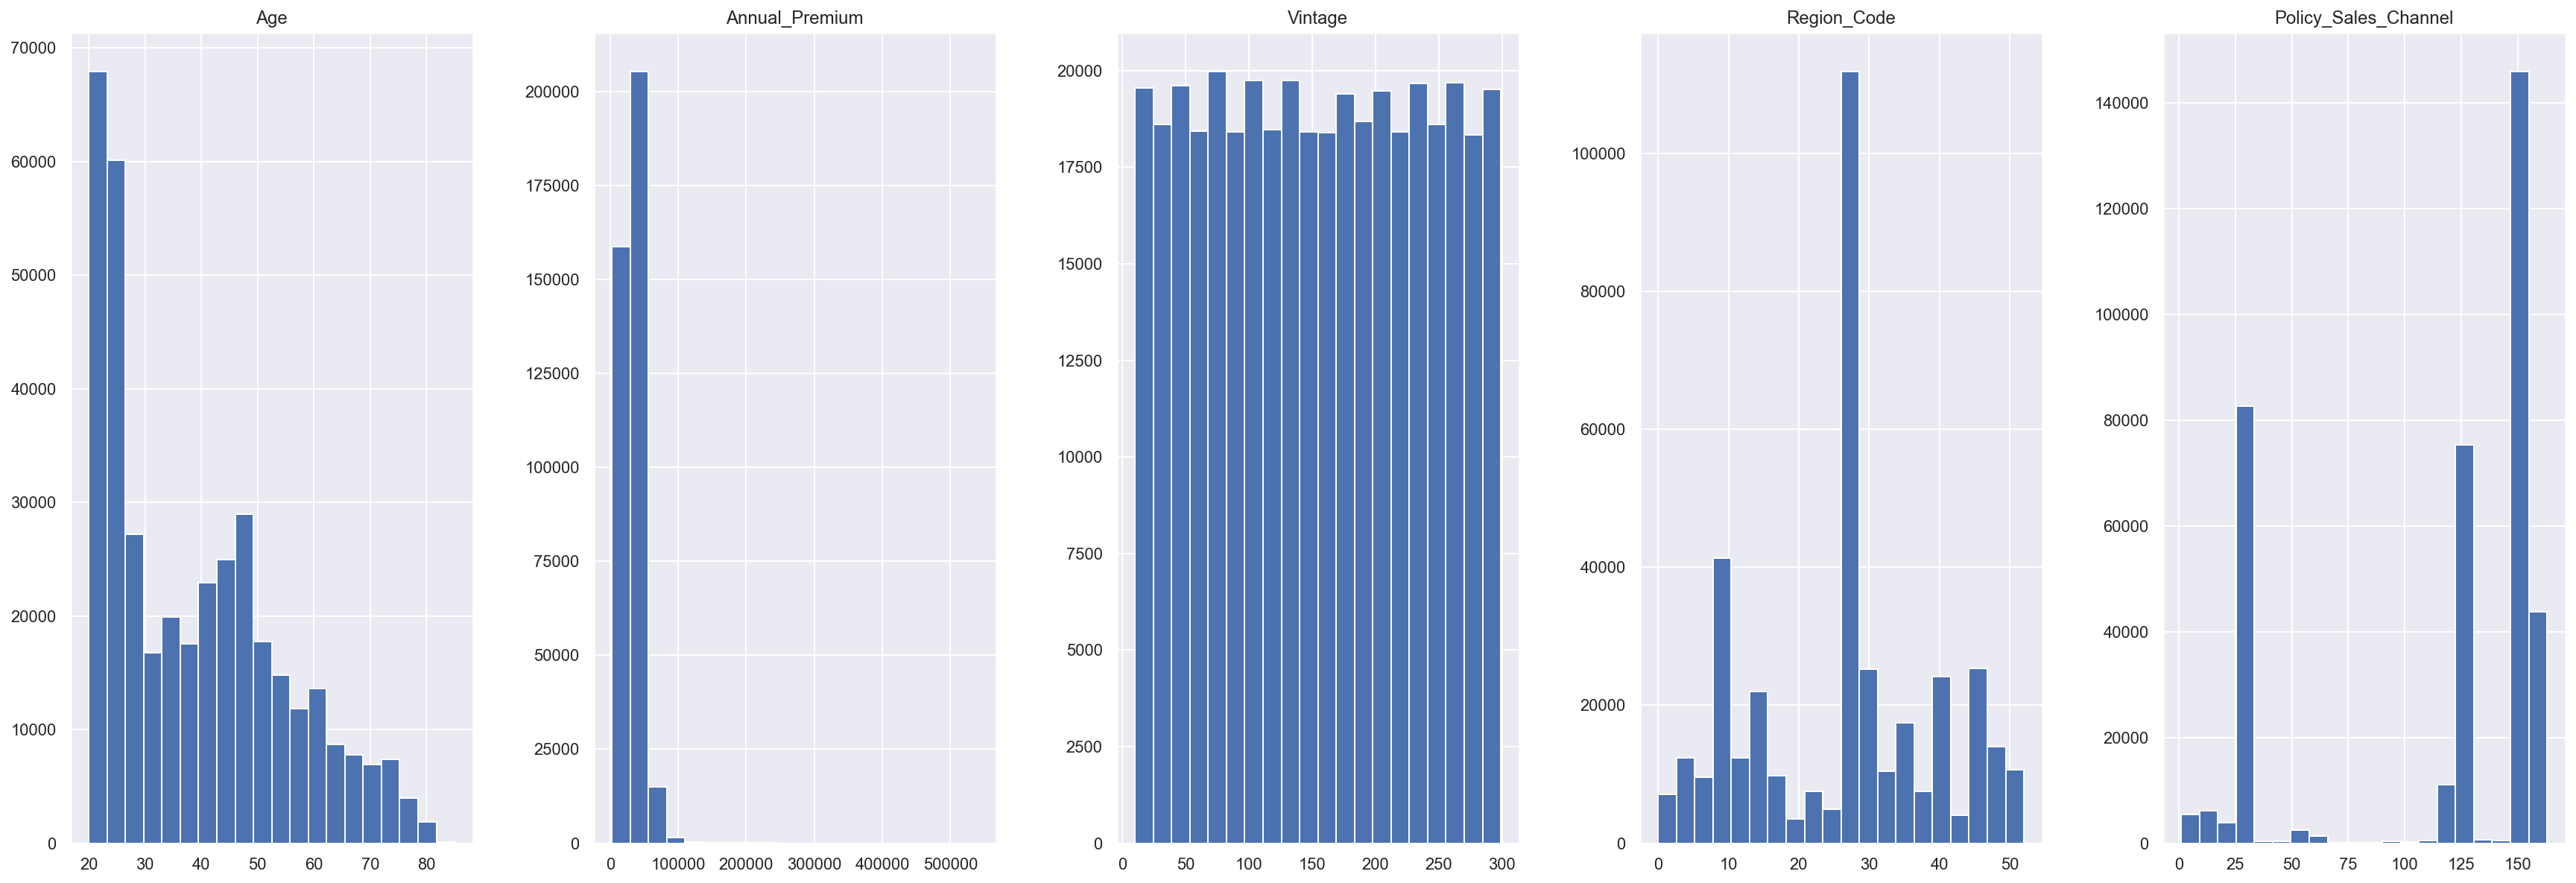

In [107]:
# Histograms to check the distribution of values of numeric columns
num_cols = ['Age', 'Annual_Premium', 'Vintage', 'Region_Code', 'Policy_Sales_Channel']
fig, ax = plt.subplots(1, 5, figsize=(30, 10))
train_df[num_cols].hist(bins=20, figsize=(10, 7), ax=ax)
plt.show()

Vehicle Age by Gender

<AxesSubplot:xlabel='Vehicle_Age'>

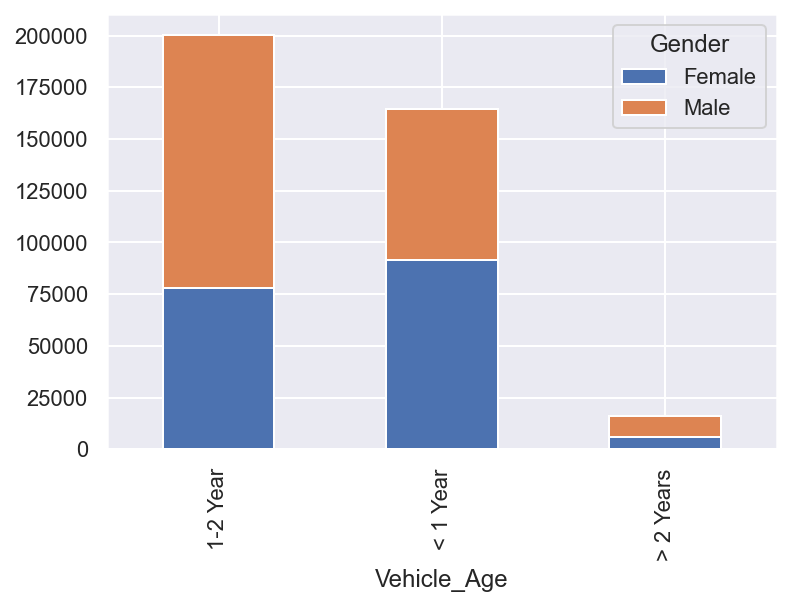

In [108]:
train_df.groupby(['Vehicle_Age', 'Gender'])['Gender'].count().unstack().plot(kind="bar", stacked=True)

Check Outliers

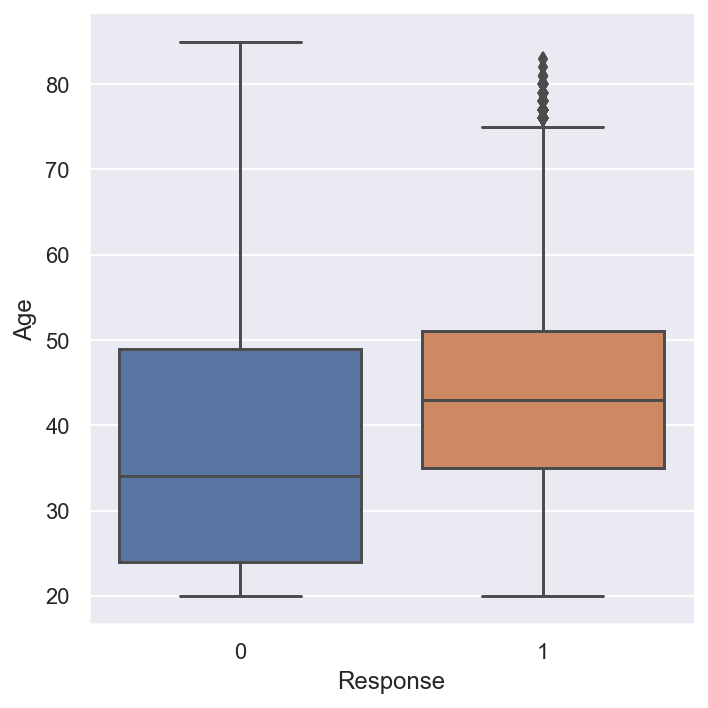

In [109]:
sns.catplot(x="Response", y="Age", data=train_df, kind="box");

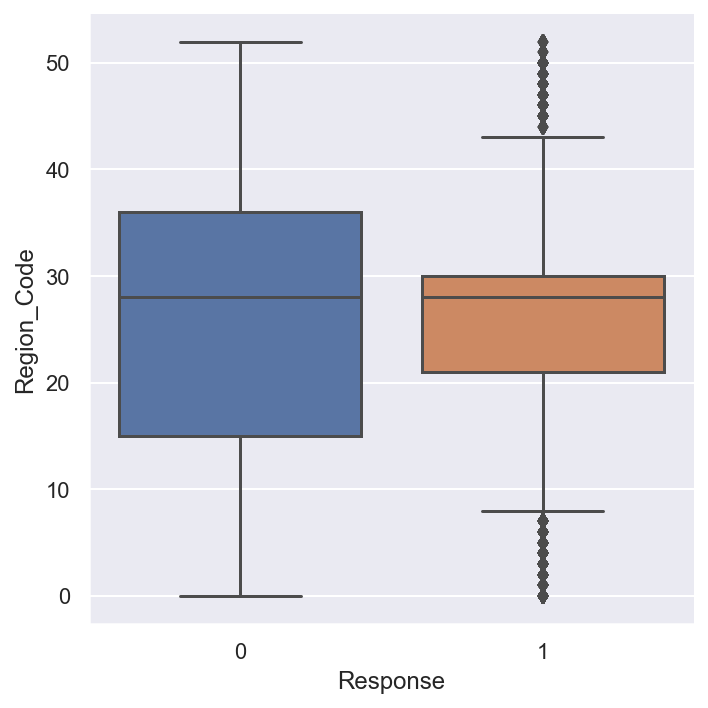

In [110]:
sns.catplot(x="Response", y="Region_Code", data=train_df, kind="box");

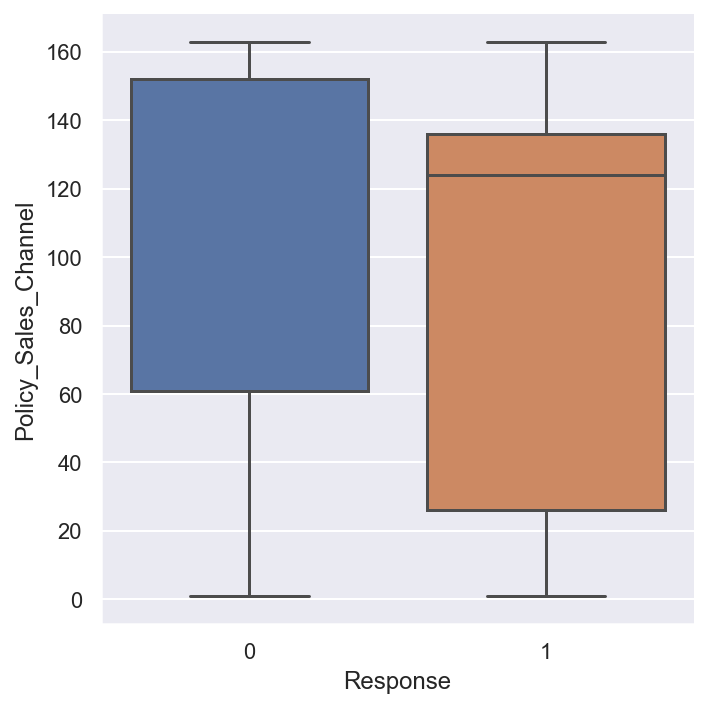

In [111]:
sns.catplot(x="Response", y="Policy_Sales_Channel", data=train_df, kind="box");

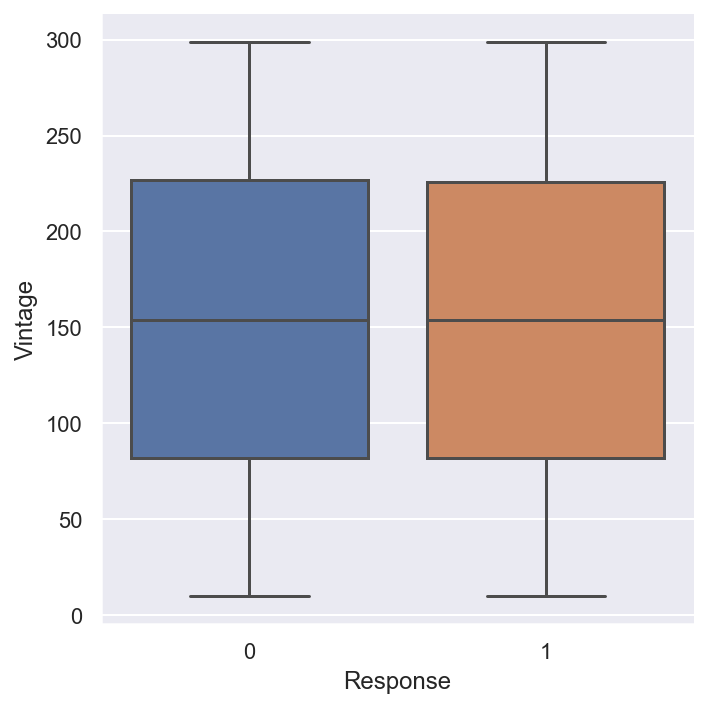

In [112]:
sns.catplot(x="Response", y="Vintage", data=train_df, kind="box");

[Text(0.5, 1.0, 'Histogram of Region Codes for Each Response')]

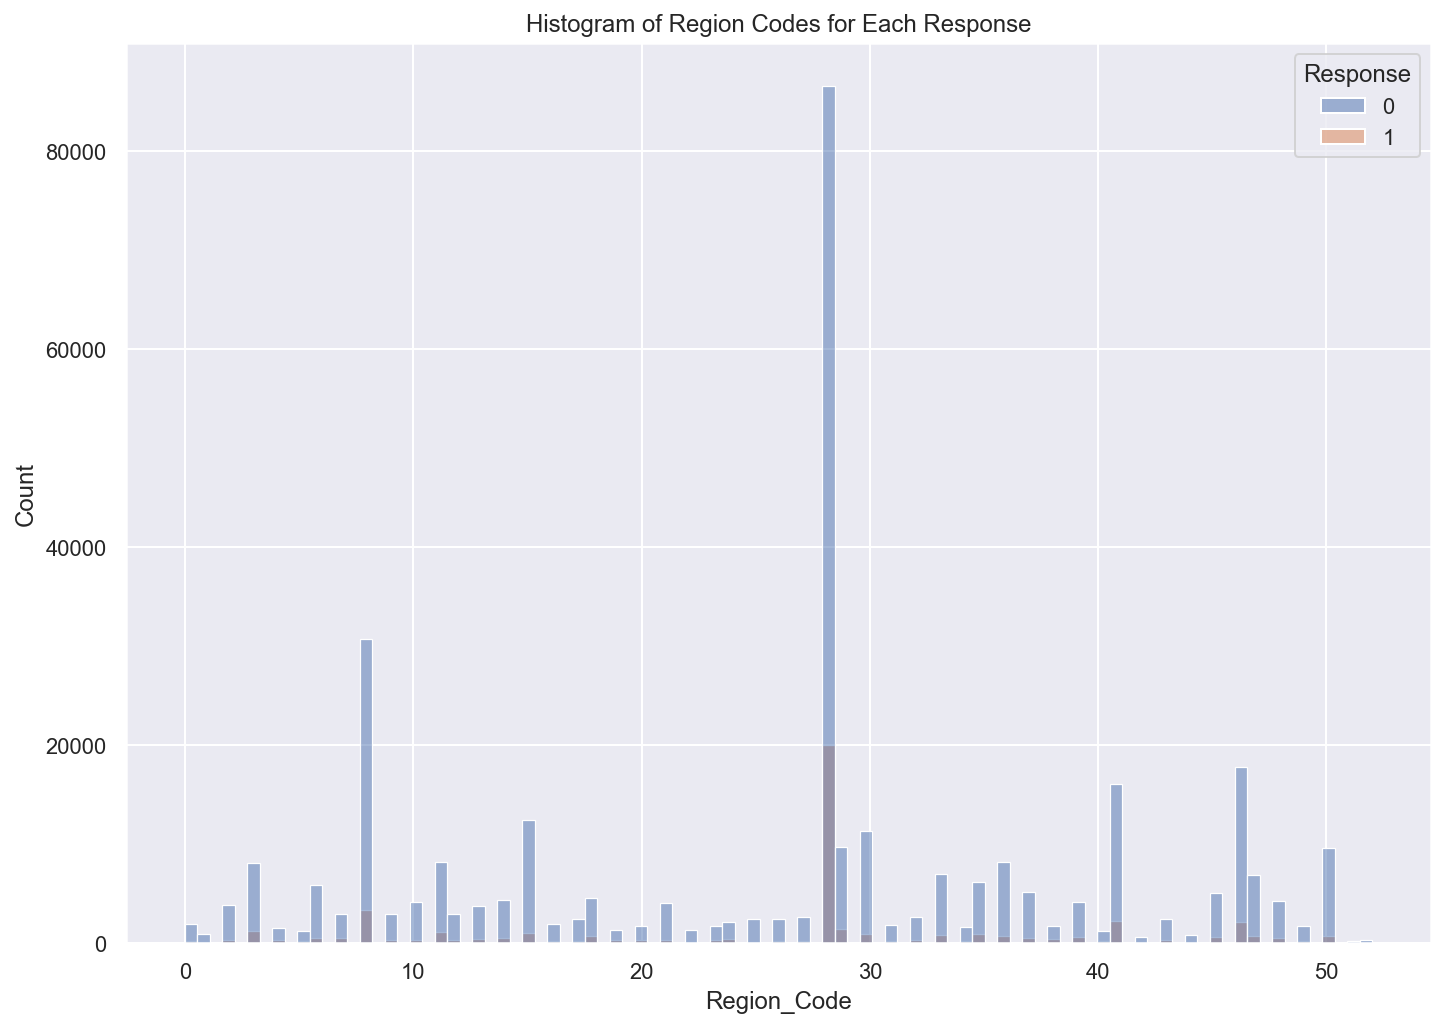

In [113]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=train_df, x="Region_Code", 
             hue = "Response").set(title = "Histogram of Region Codes for Each Response")

[Text(0.5, 1.0, 'Histogram of Previously Insured count for Each Response type')]

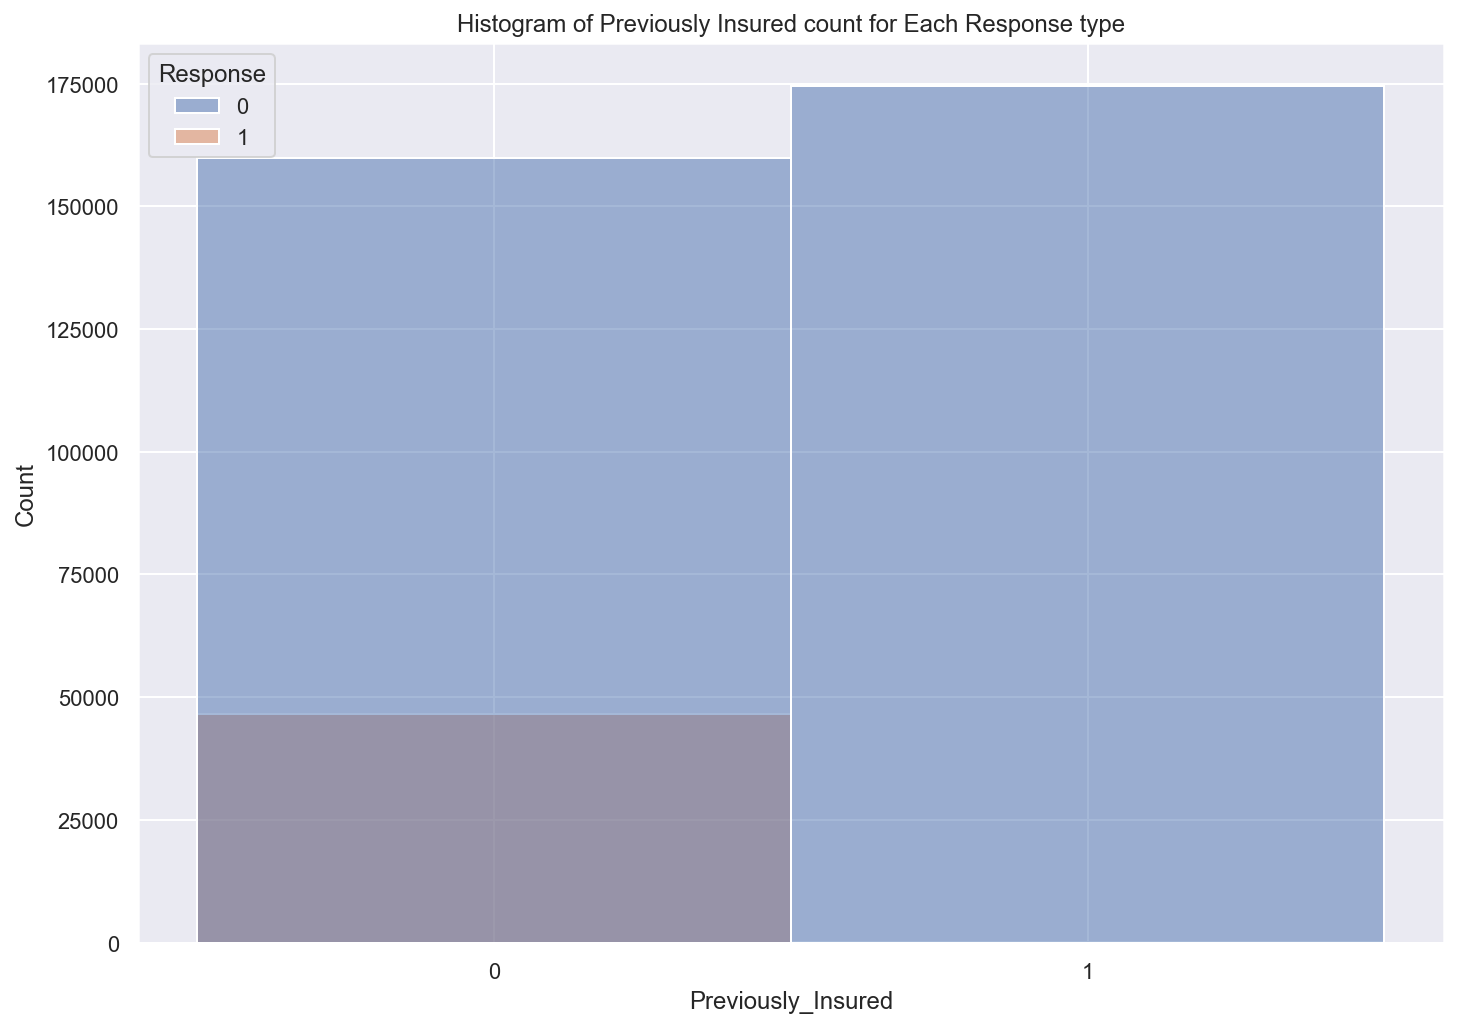

In [114]:
train_df['Previously_Insured'] = train_df.Previously_Insured.astype(str)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=train_df, x="Previously_Insured", 
             hue = "Response").set(title = "Histogram of Previously Insured count for Each Response type")
# none of the previously insured had a response 1, meaning previously insured customers are NOT interested

<AxesSubplot:xlabel='Response'>

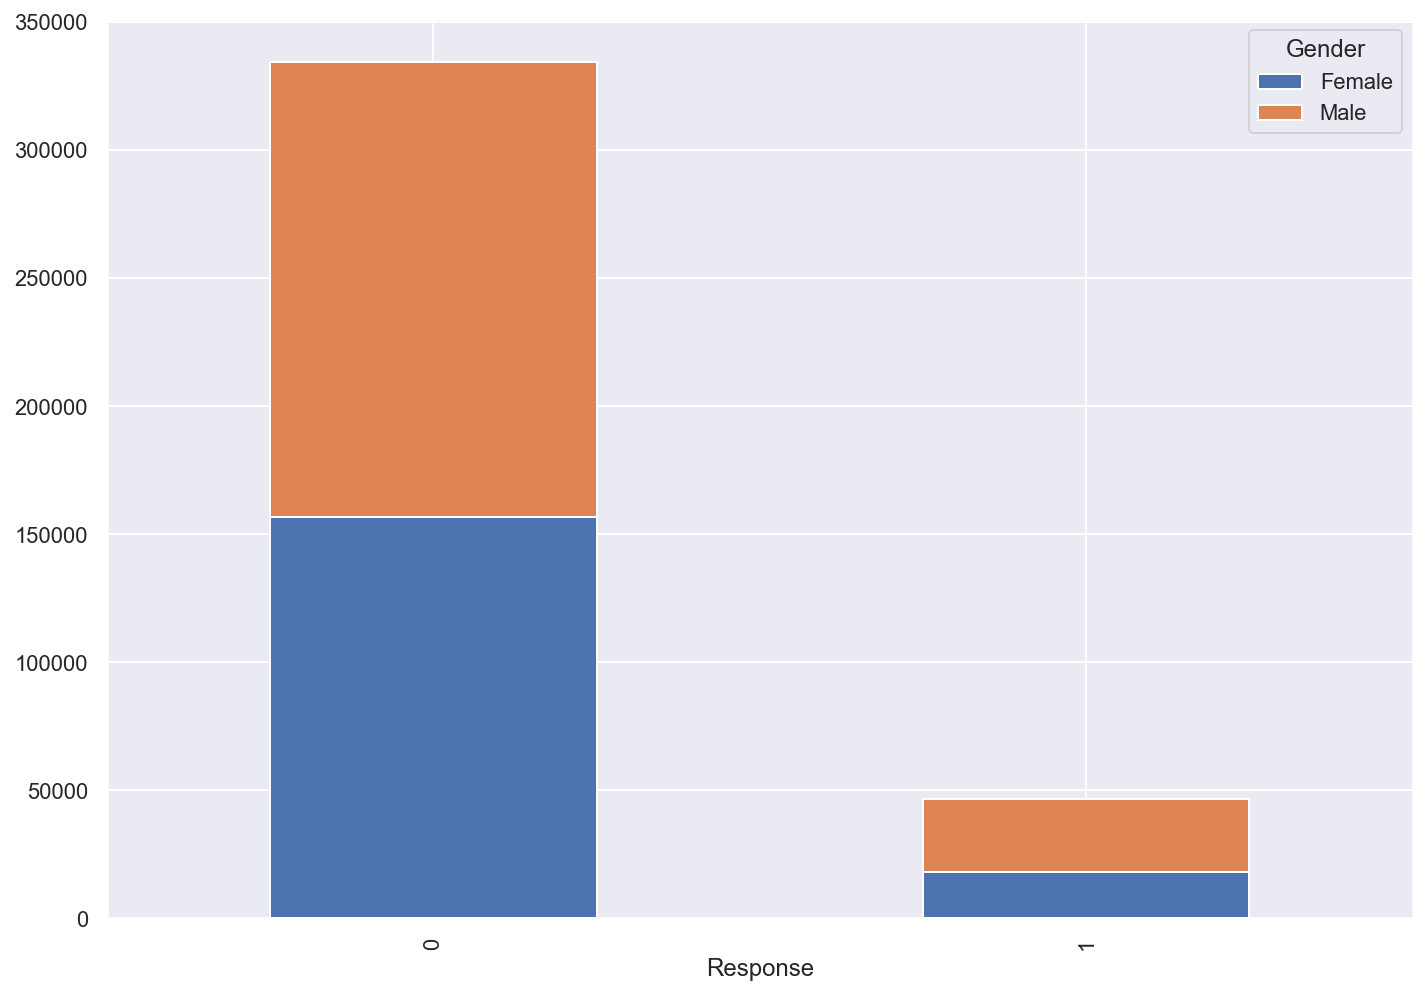

In [115]:
train_df.groupby(['Response', 'Gender'])['Gender'].count().unstack().plot(kind="bar", stacked=True)

In [116]:
### We need to create some pair plot to see the relation between the features.
pairplot = train_df.drop(['id','Gender', 'Vehicle_Damage', 'Vehicle_Age', 'Driving_License', 'Region_Code','Policy_Sales_Channel','Previously_Insured' ], axis =1)

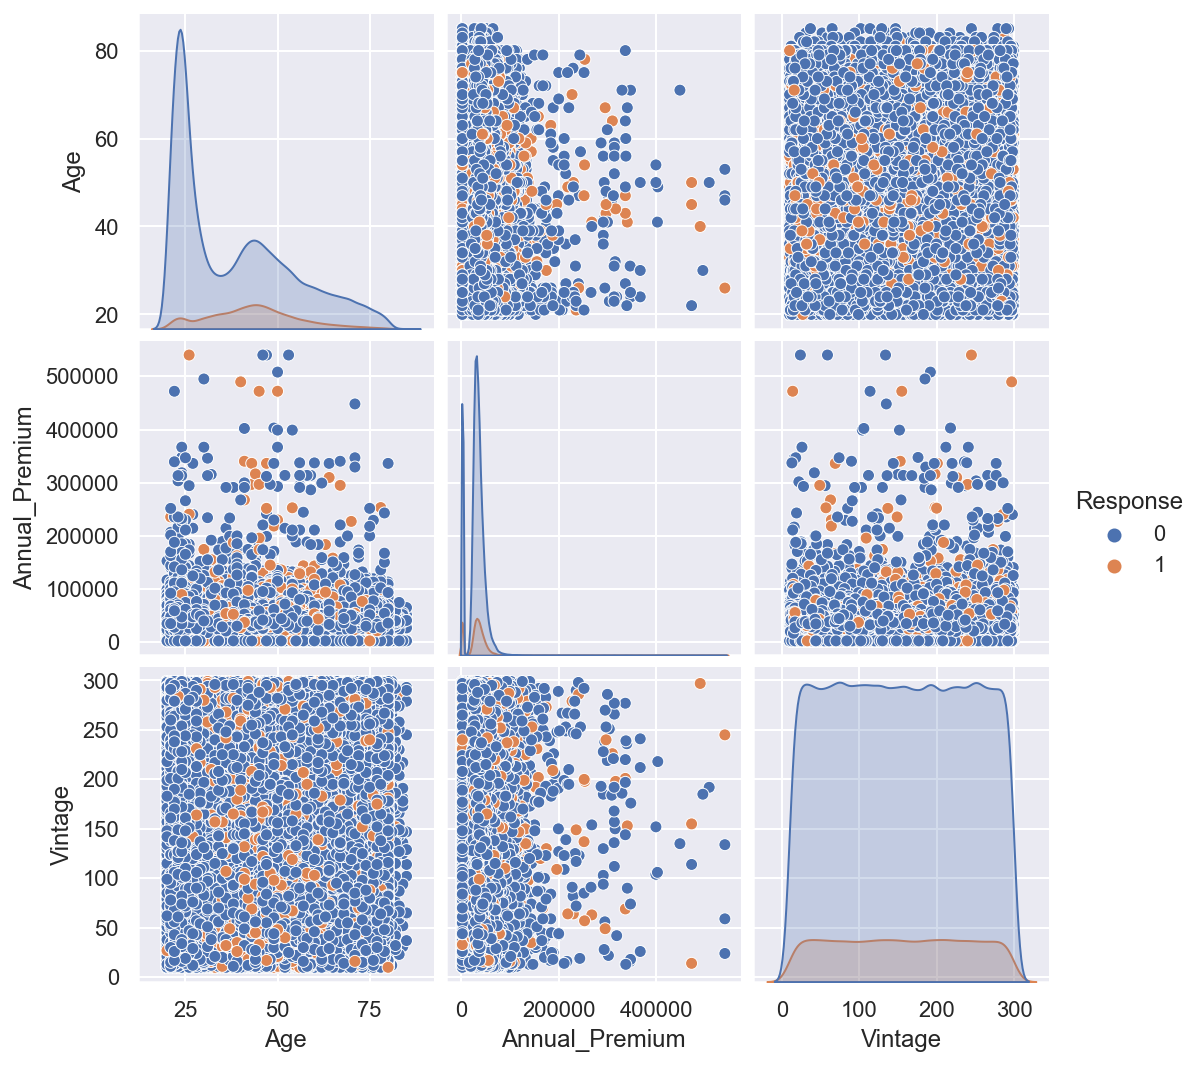

In [117]:
sns.pairplot(pairplot, hue ='Response')


#From the above graphs we can see that data is skewed, Before training the model we will correct the skewness using Preprocess

Normalized graphs showing response rate against categorical columns

<AxesSubplot:xlabel='Region_Code'>

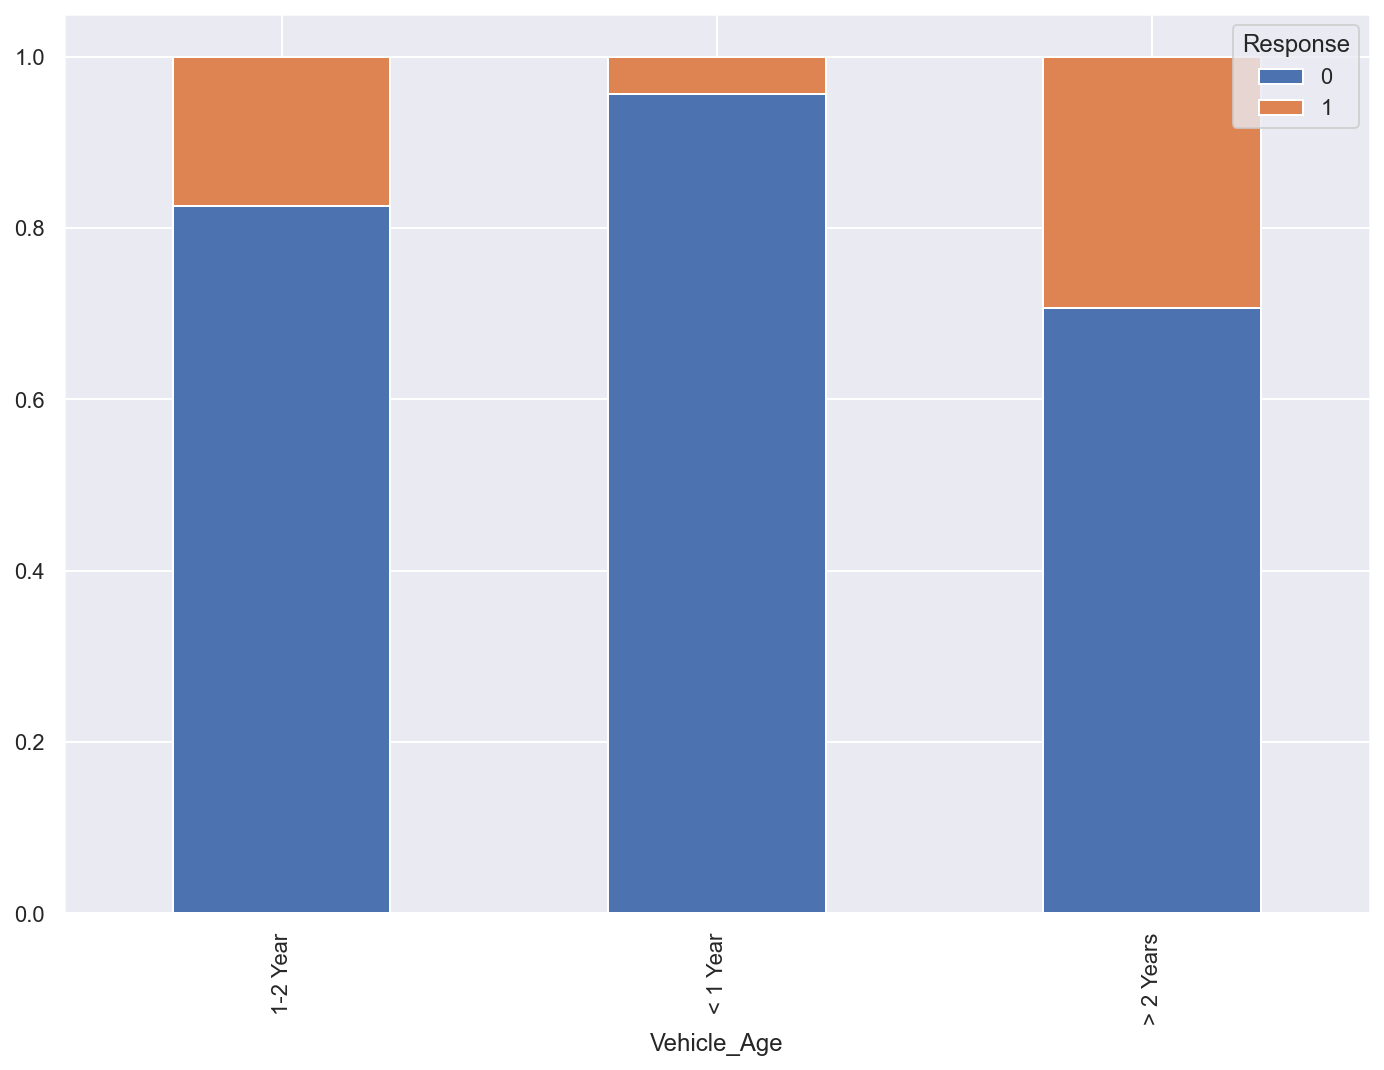

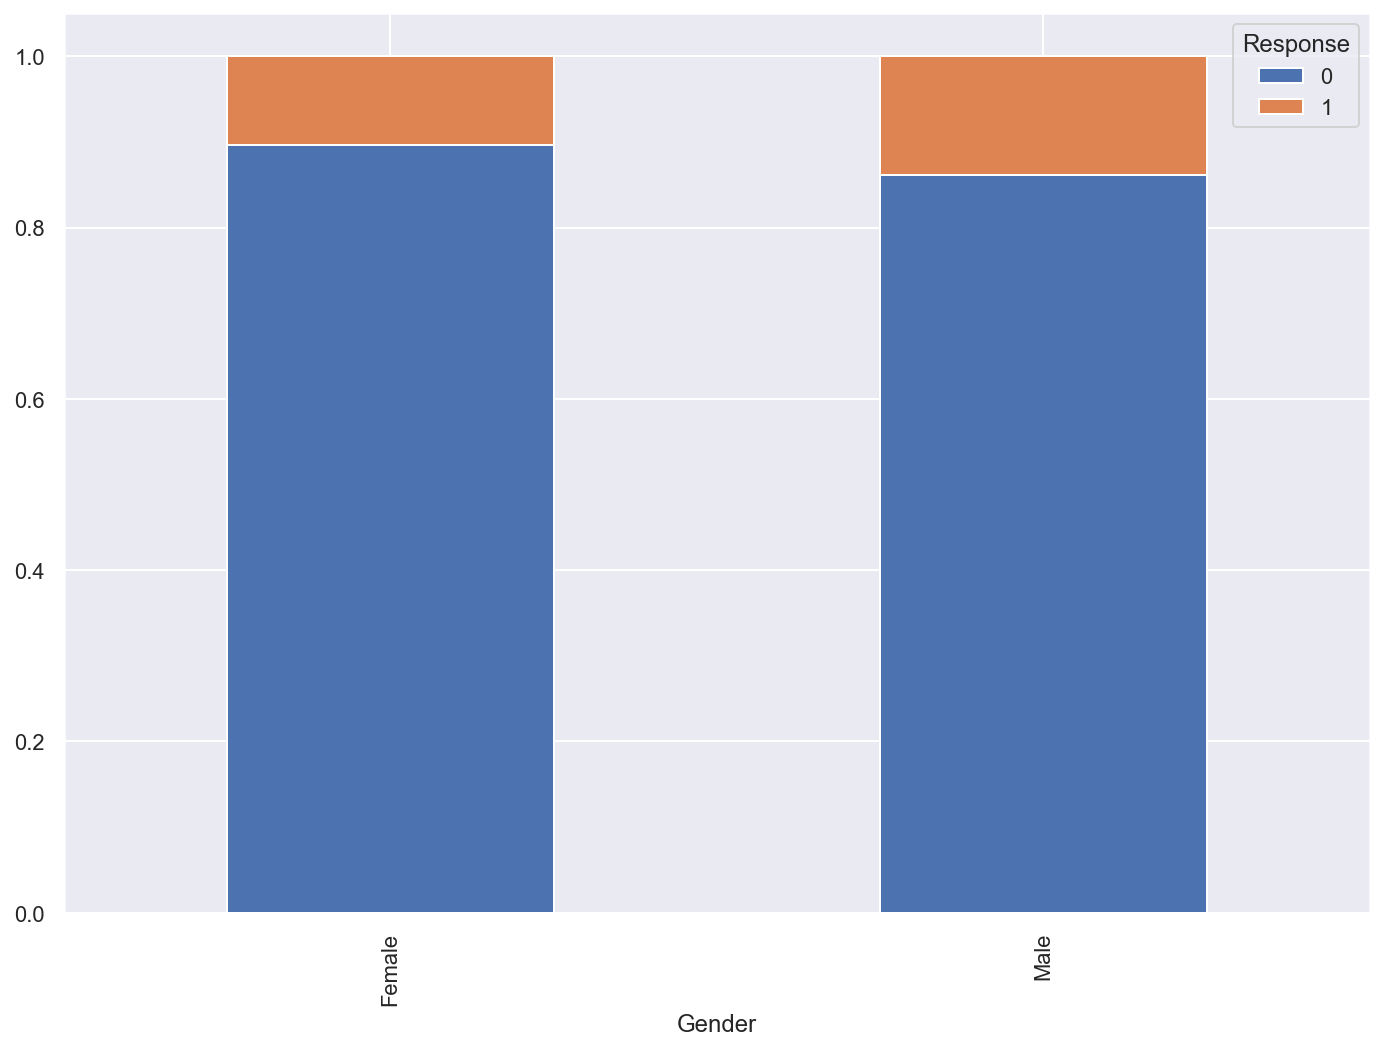

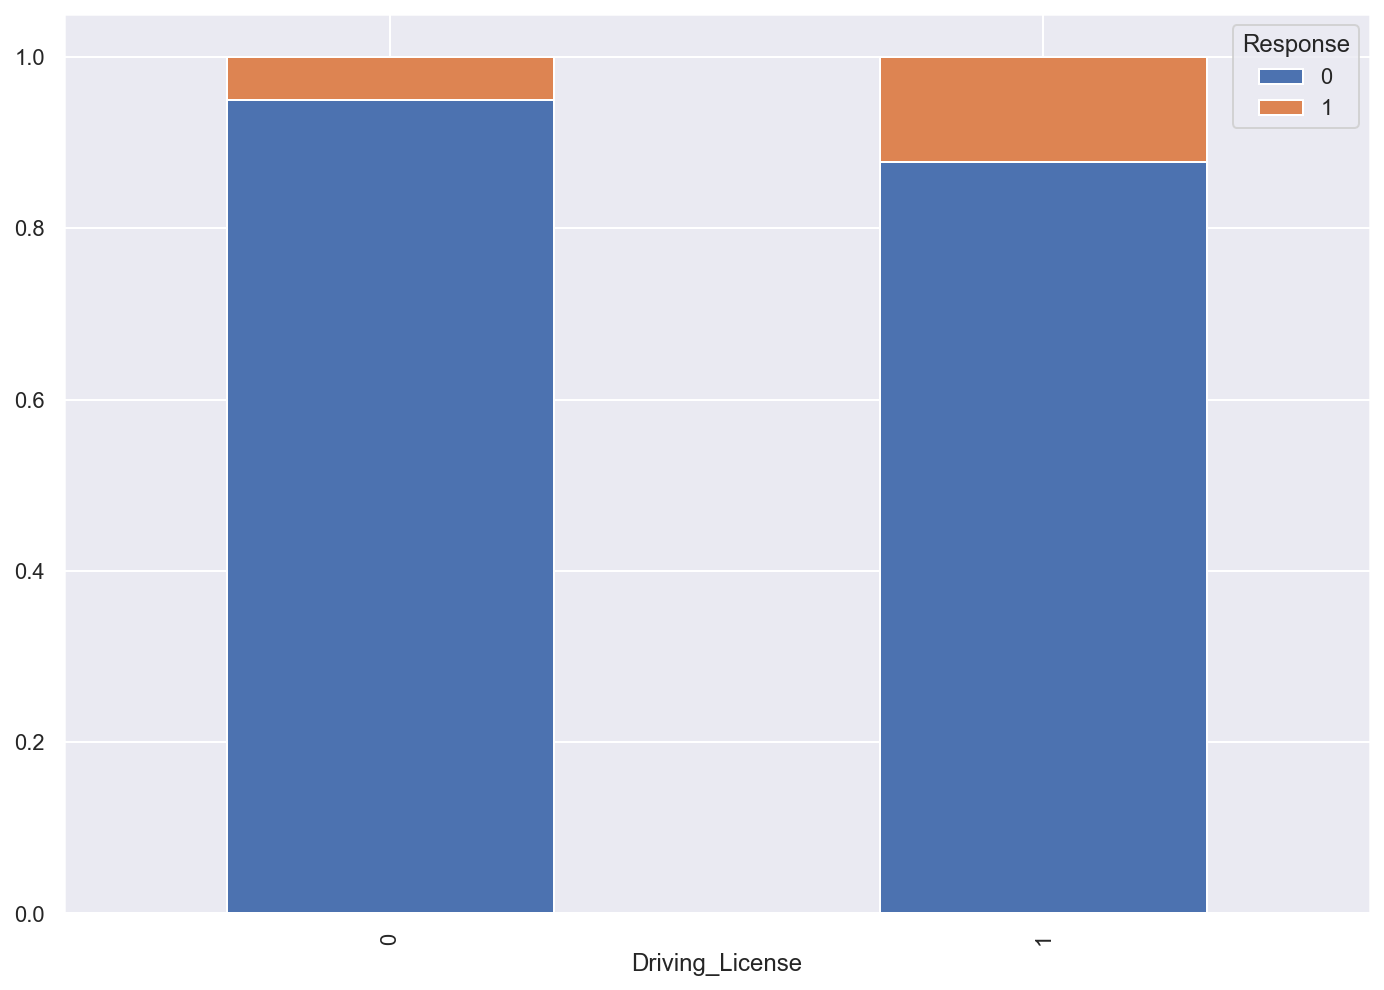

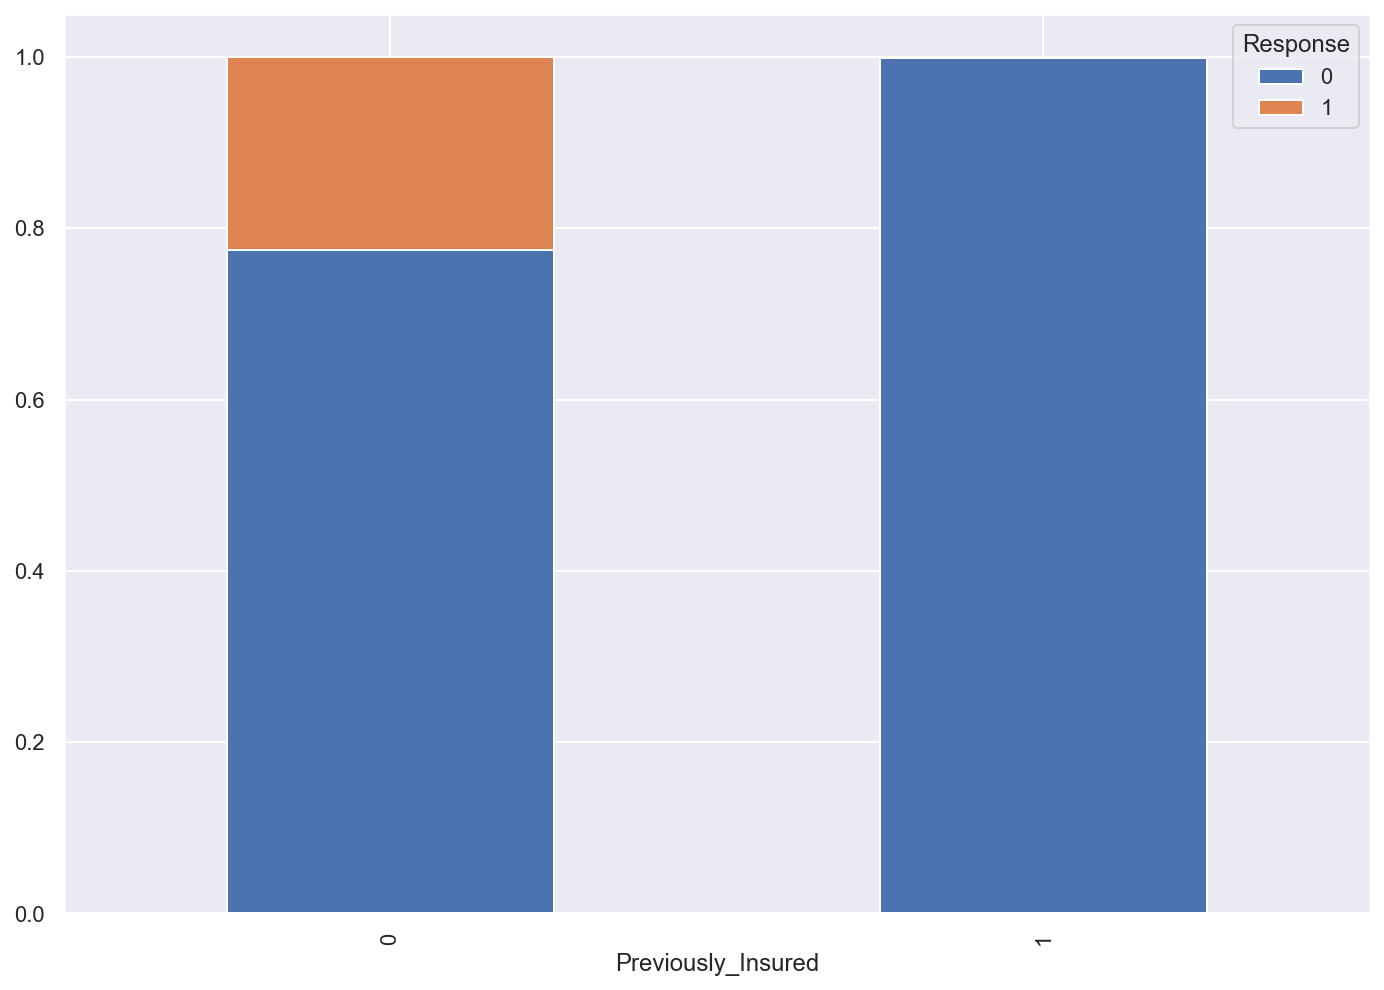

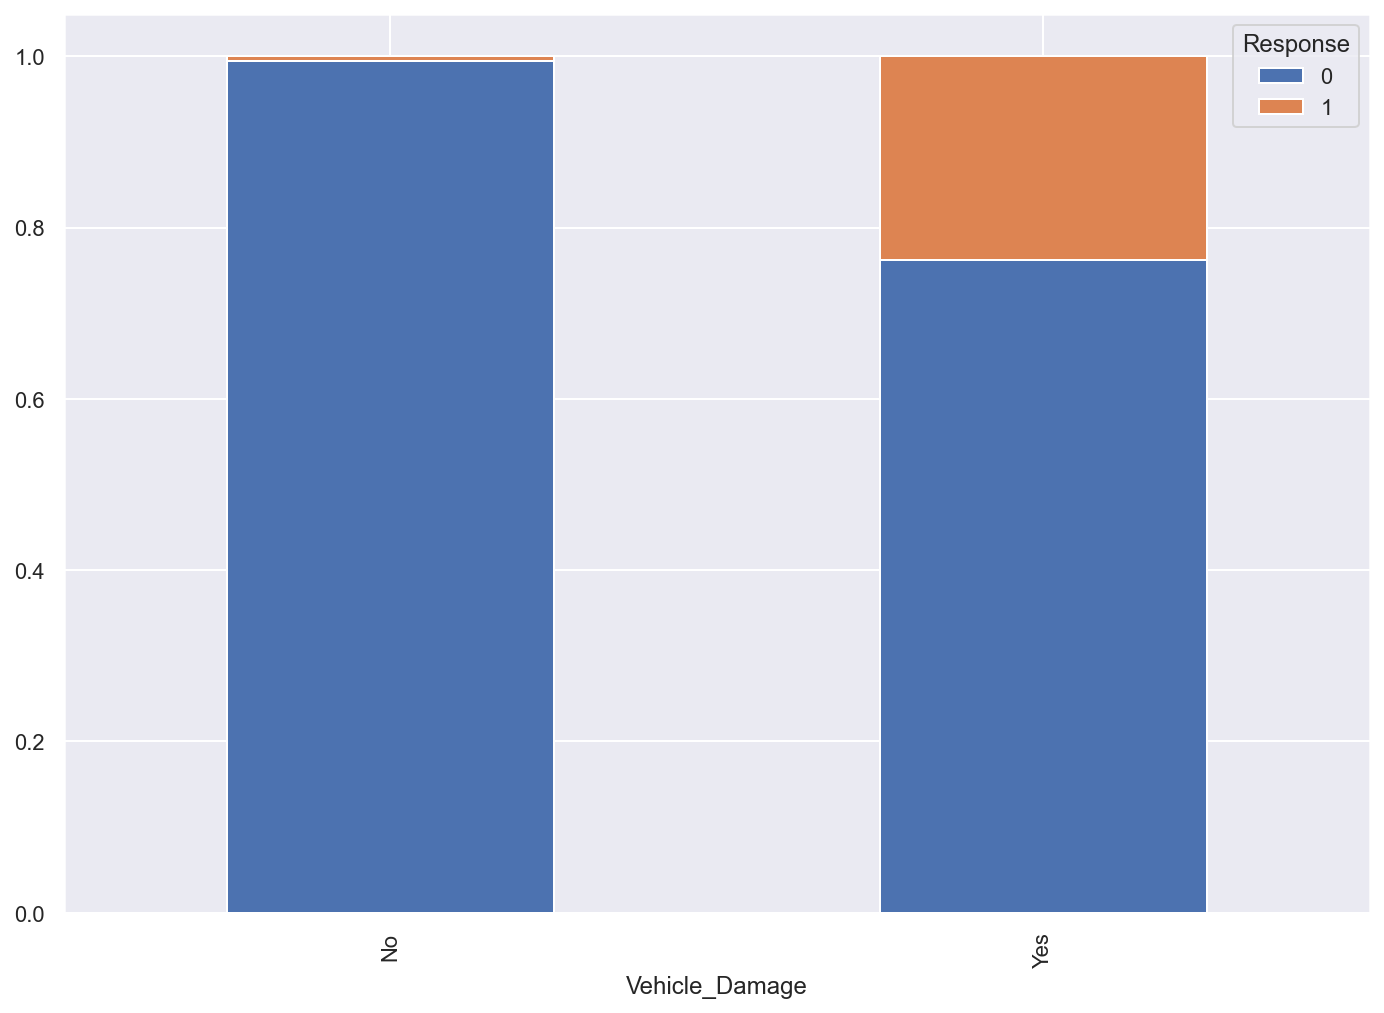

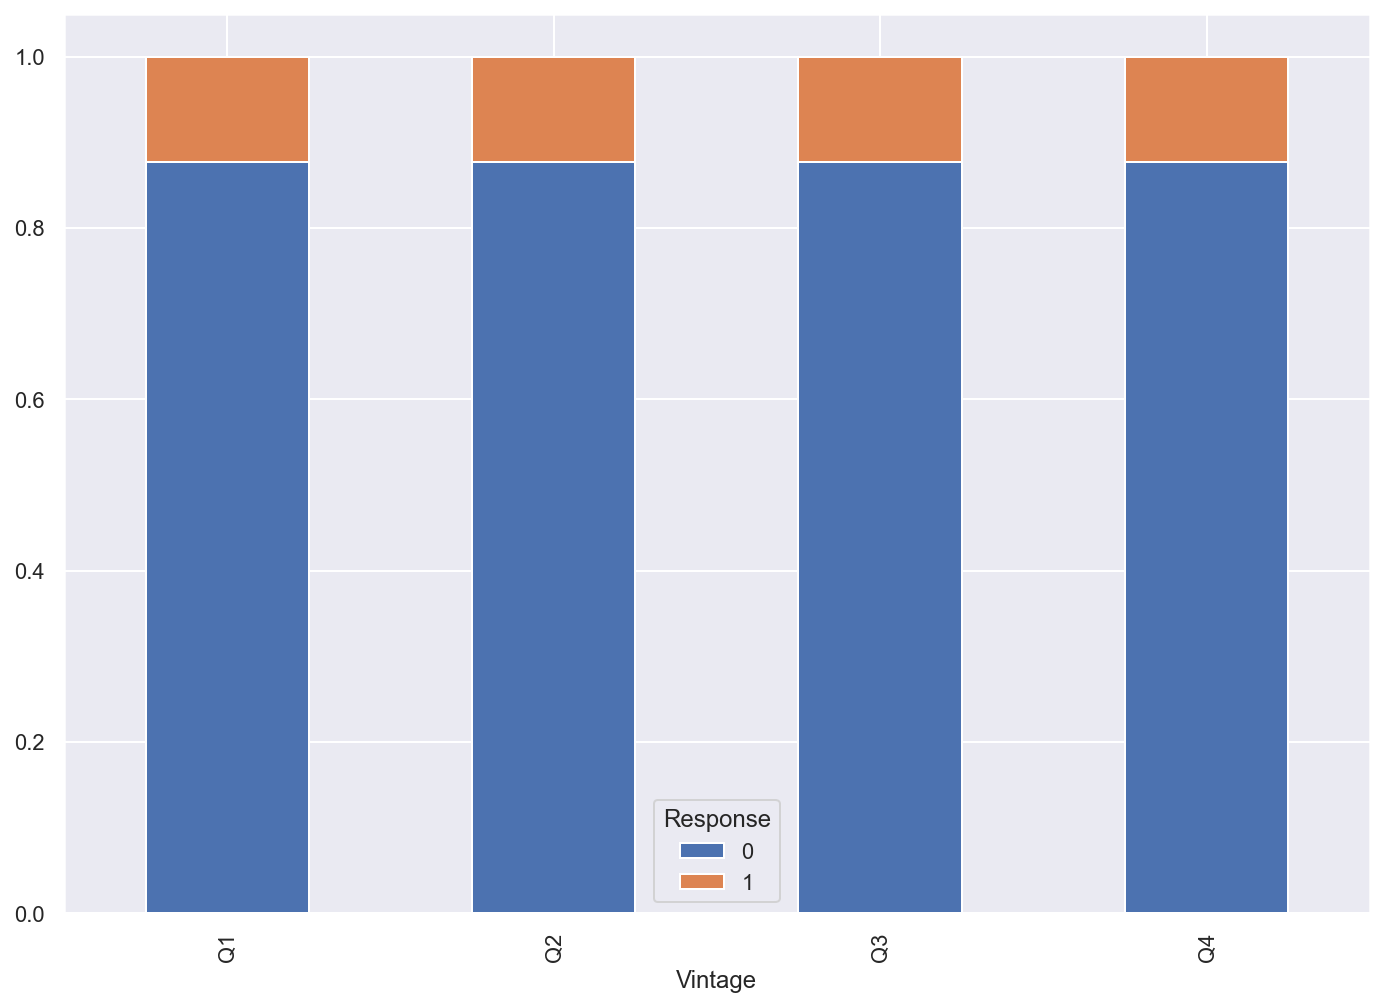

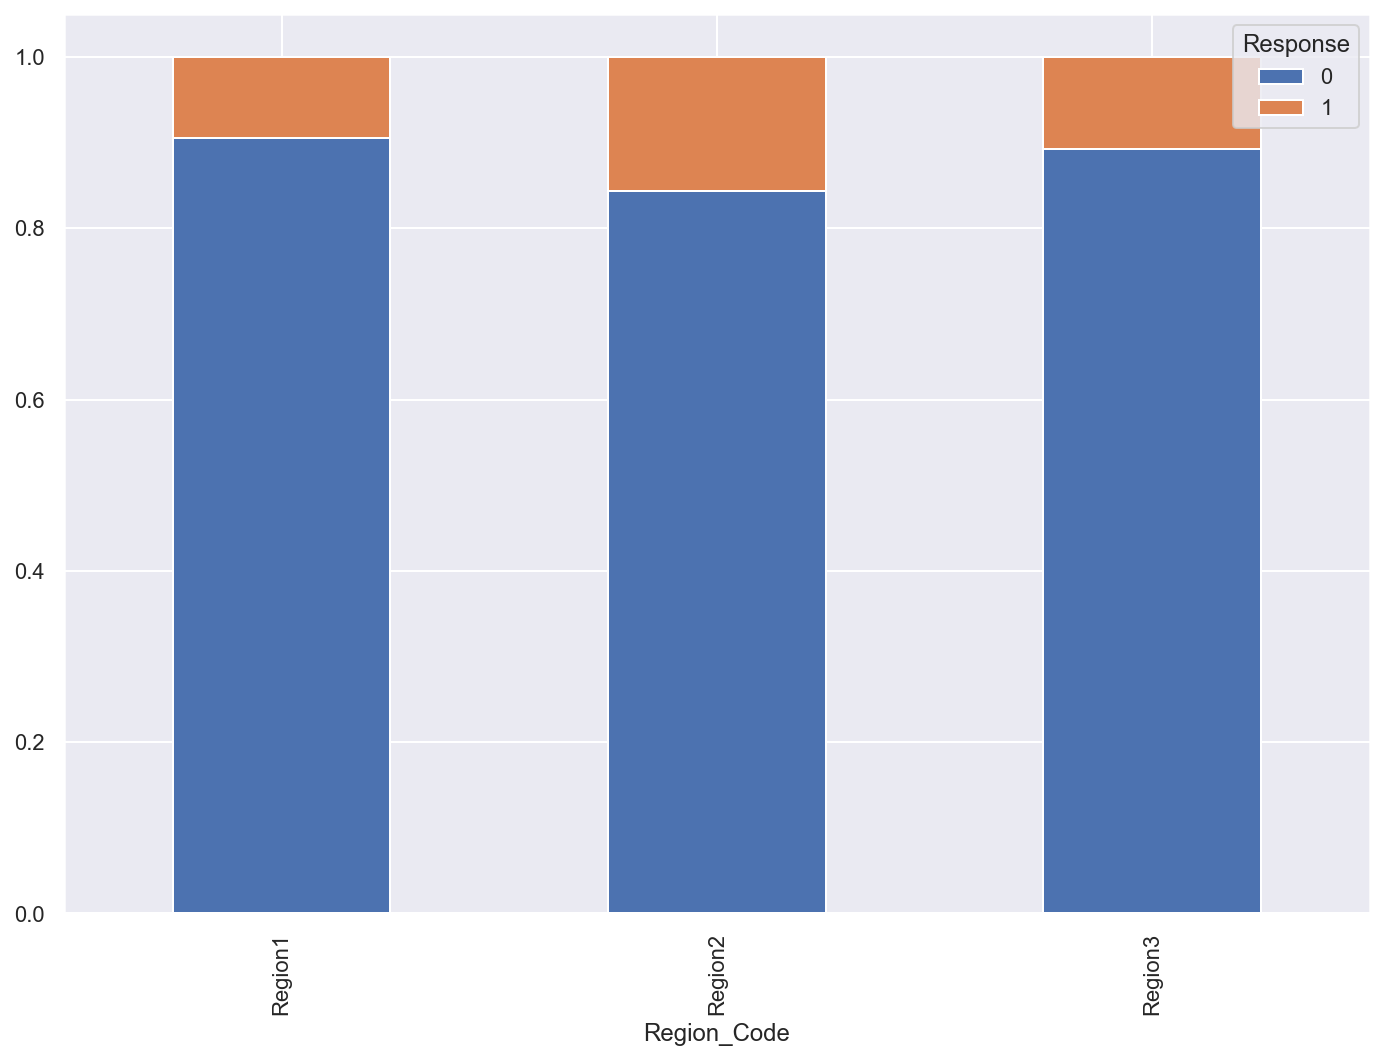

In [118]:
# Check for the response rate of categorical columns
# Normalized bar chart of categorical variables to response

# bin the values: Age, Region_Code, Vintage
# Bin 'Age' column categories:
# Ages 0 to 35: Young Adult
# Ages 36 to 55: Adult
# Ages 56 to 99: Senior

df_temp = train_df.copy()
df_temp['Age'] = pd.cut(df_temp['Age'], bins=[0,35,55,99],
                       labels=['Young Adult', 'Adult', 'Senior'])

# Bin 'Vintage' column - so it's the number of days the customer has been with the business
df_temp = df_temp.copy()
df_temp['Vintage'] = pd.cut(df_temp['Vintage'], bins=[0,91,183,274, 365],
                       labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Bin 'Region_Code' column - so it's the number of days the customer has been with the business
df_temp = df_temp.copy()
df_temp['Region_Code'] = pd.cut(df_temp['Region_Code'], bins=[0,15,30,45],
                       labels=['Region1', 'Region2', 'Region3'])

crosstab_01 = pd.crosstab(df_temp['Vehicle_Age'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Gender'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Driving_License'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Previously_Insured'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Vehicle_Damage'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Vintage'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

crosstab_01 = pd.crosstab(df_temp['Region_Code'], df_temp['Response'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

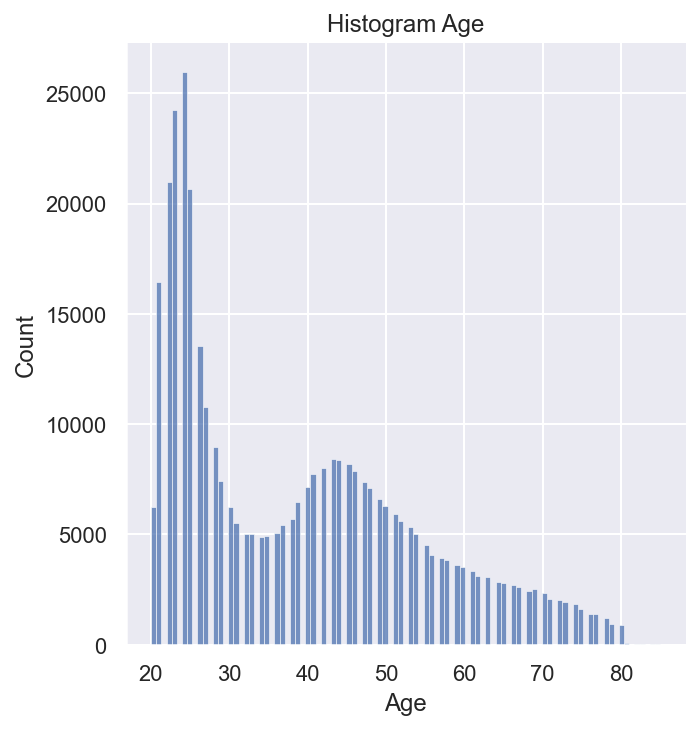

In [119]:
sns.displot(train_df, x="Age")
plt.title("Histogram Age")#title of graph
plt.show()#show graph

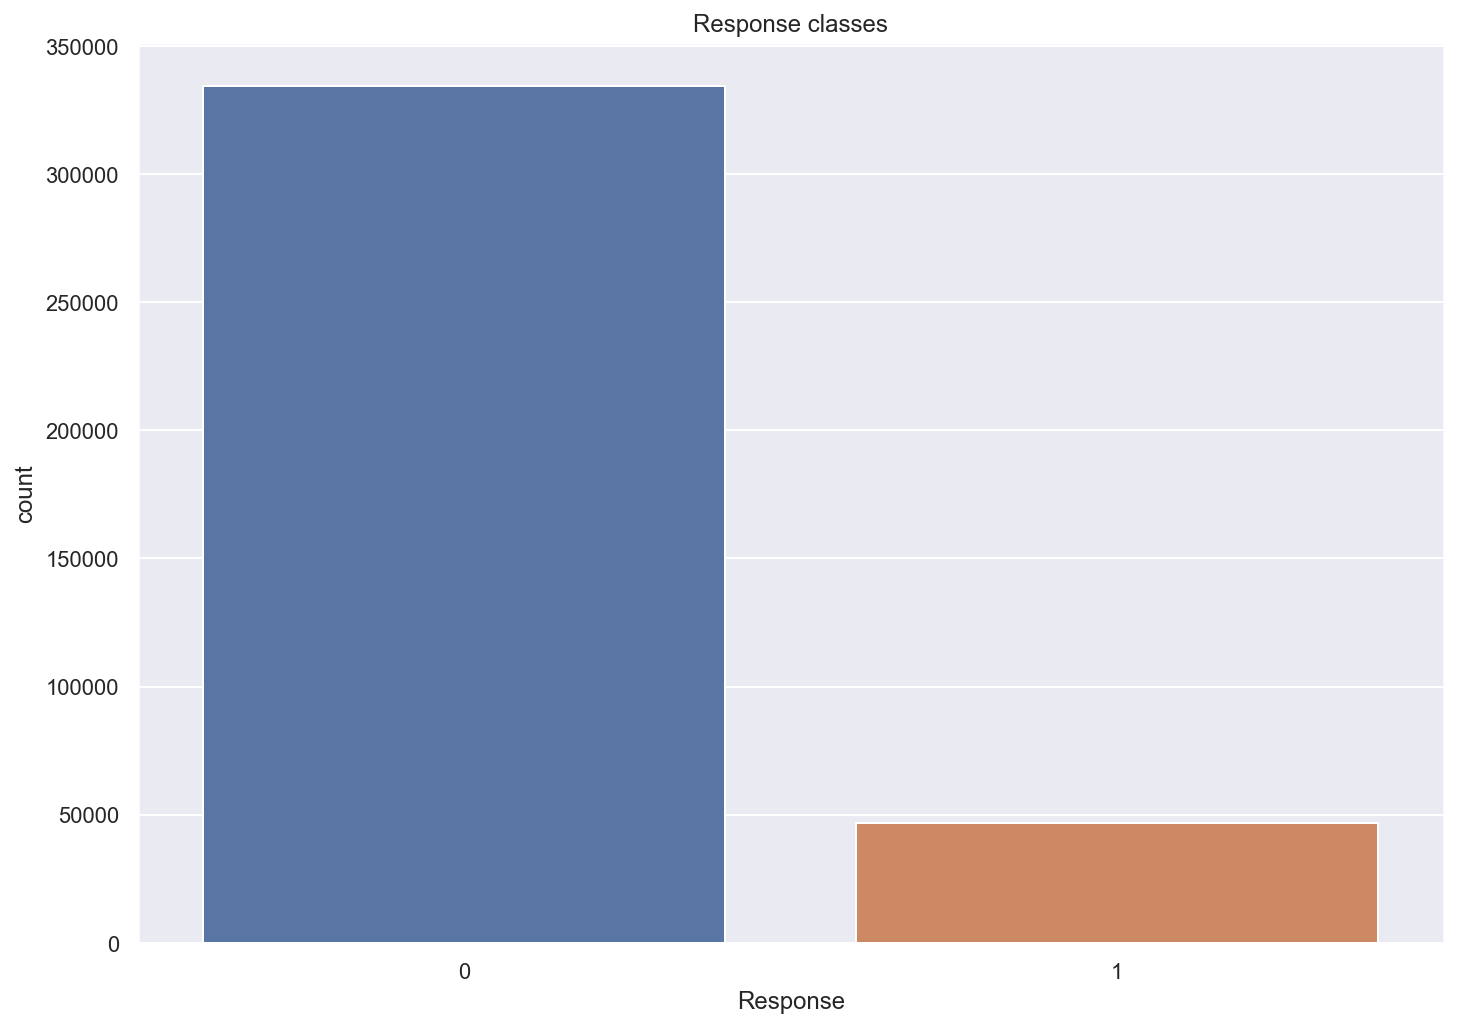

In [120]:
#Checking Target varaible 
sns.countplot(train_df.Response)
plt.title("Response classes")#title of graph
plt.show()#show graph

In [121]:
#Checking the count of  values in response
train_df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

There are higher people who whould be not be intrested compared to people that would. 

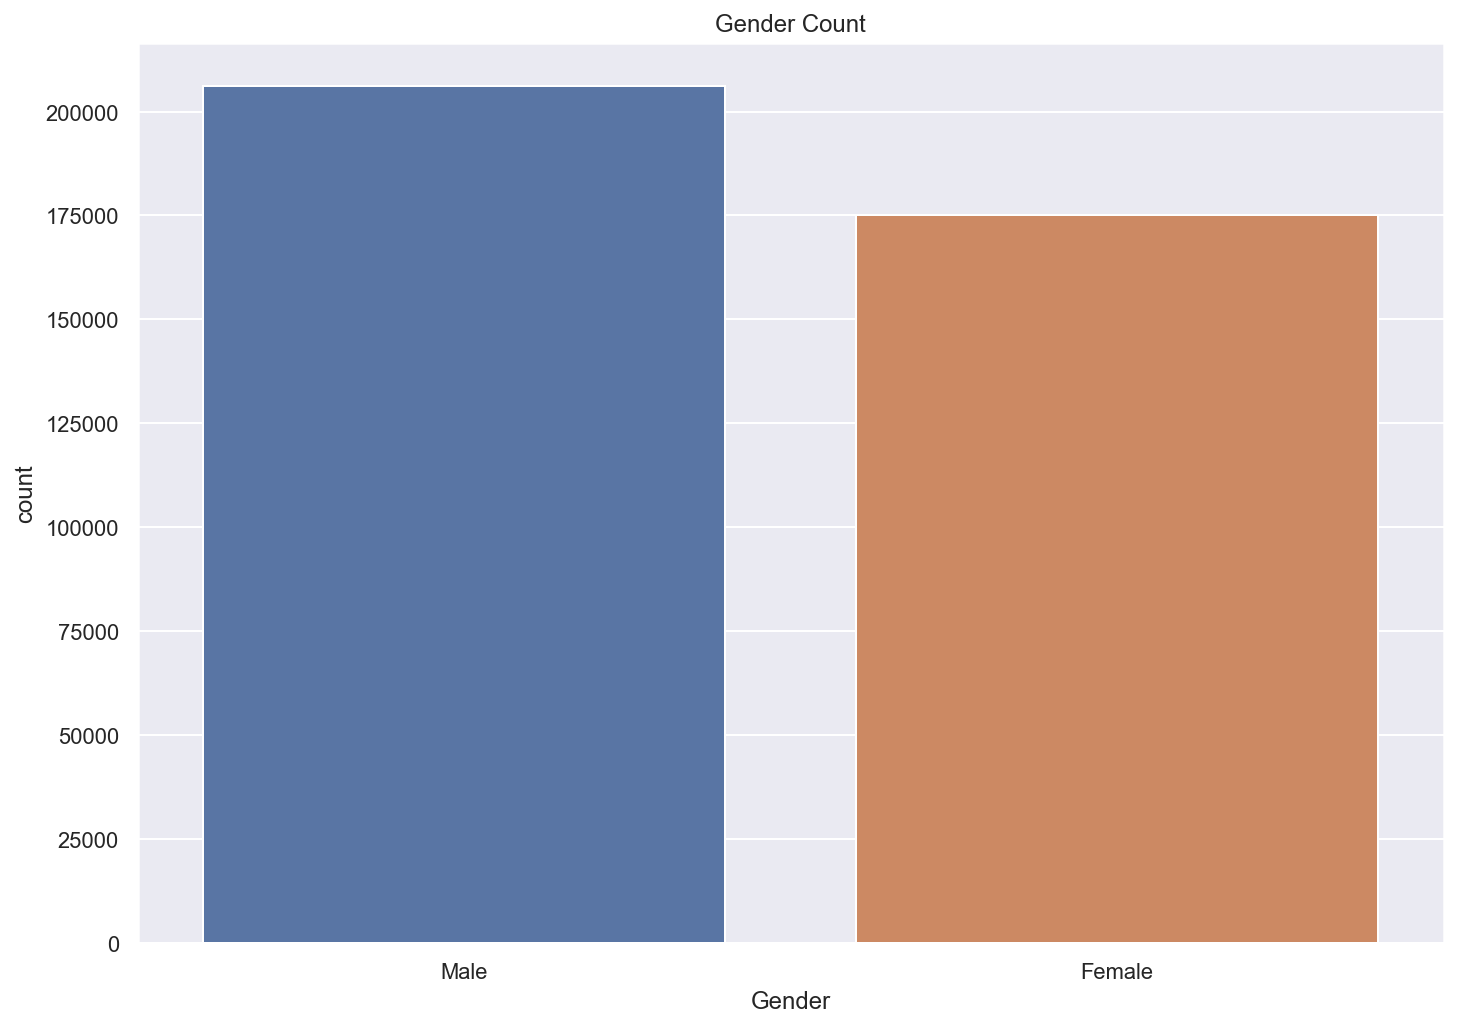

In [122]:
#Checking gender count
sns.countplot(train_df.Gender)
train_df.Gender.value_counts()
plt.title("Gender Count")#title of graph
plt.show()#show graph

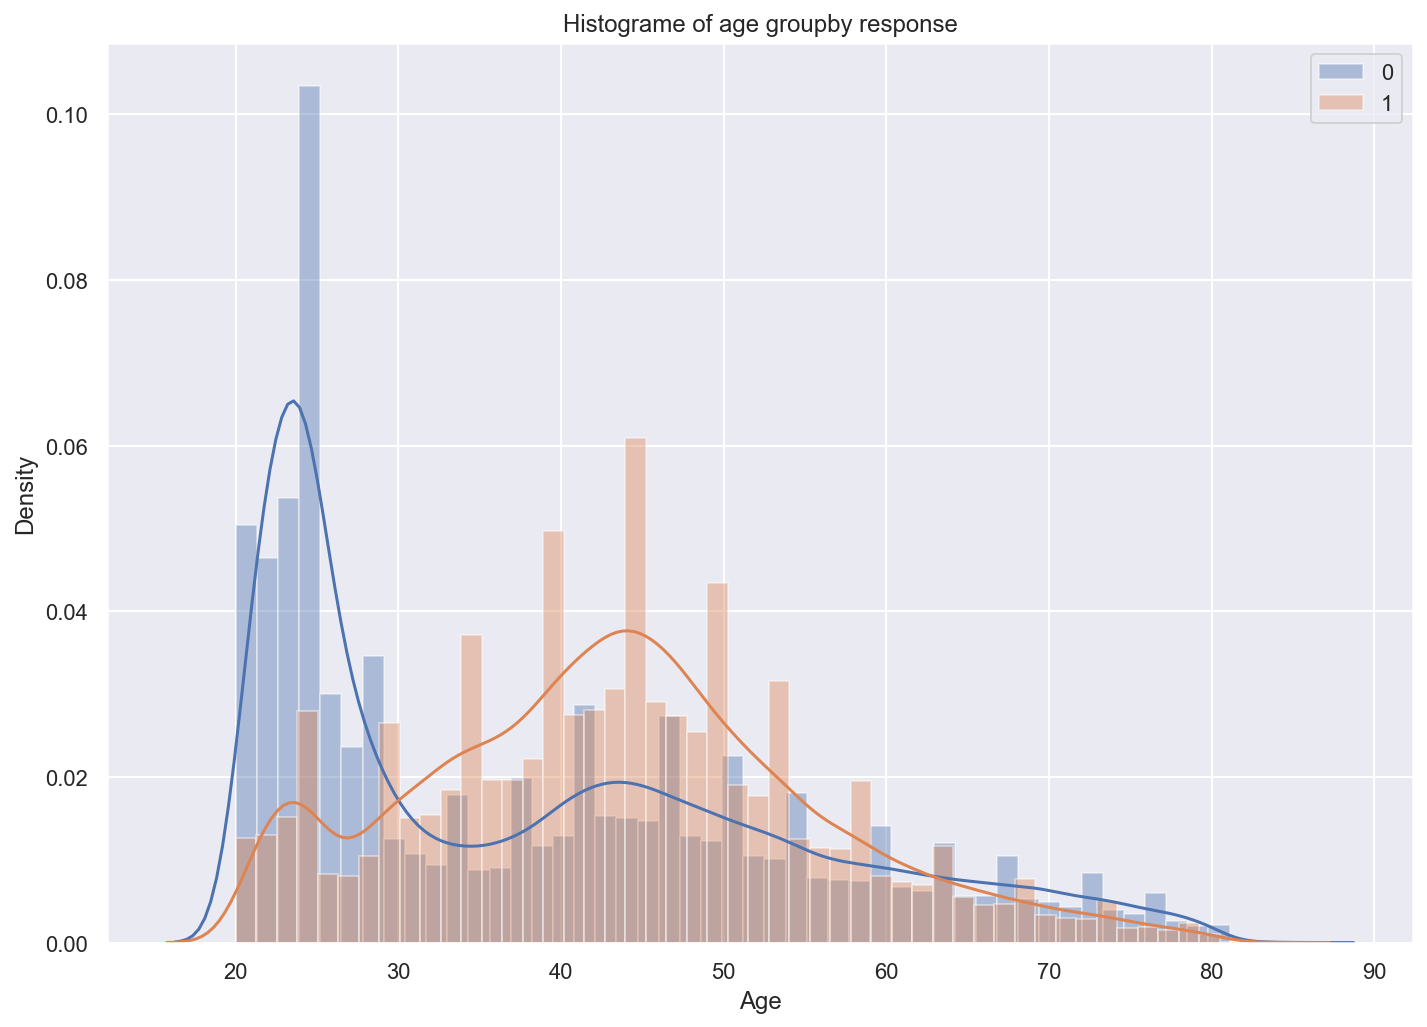

In [123]:
sns.distplot(train_df[train_df.Response==0]['Age'], label='0')
sns.distplot(train_df[train_df.Response==1]['Age'], label='1')
plt.legend()
plt.title("Histograme of age groupby response")#title of graph
plt.show()#show graph

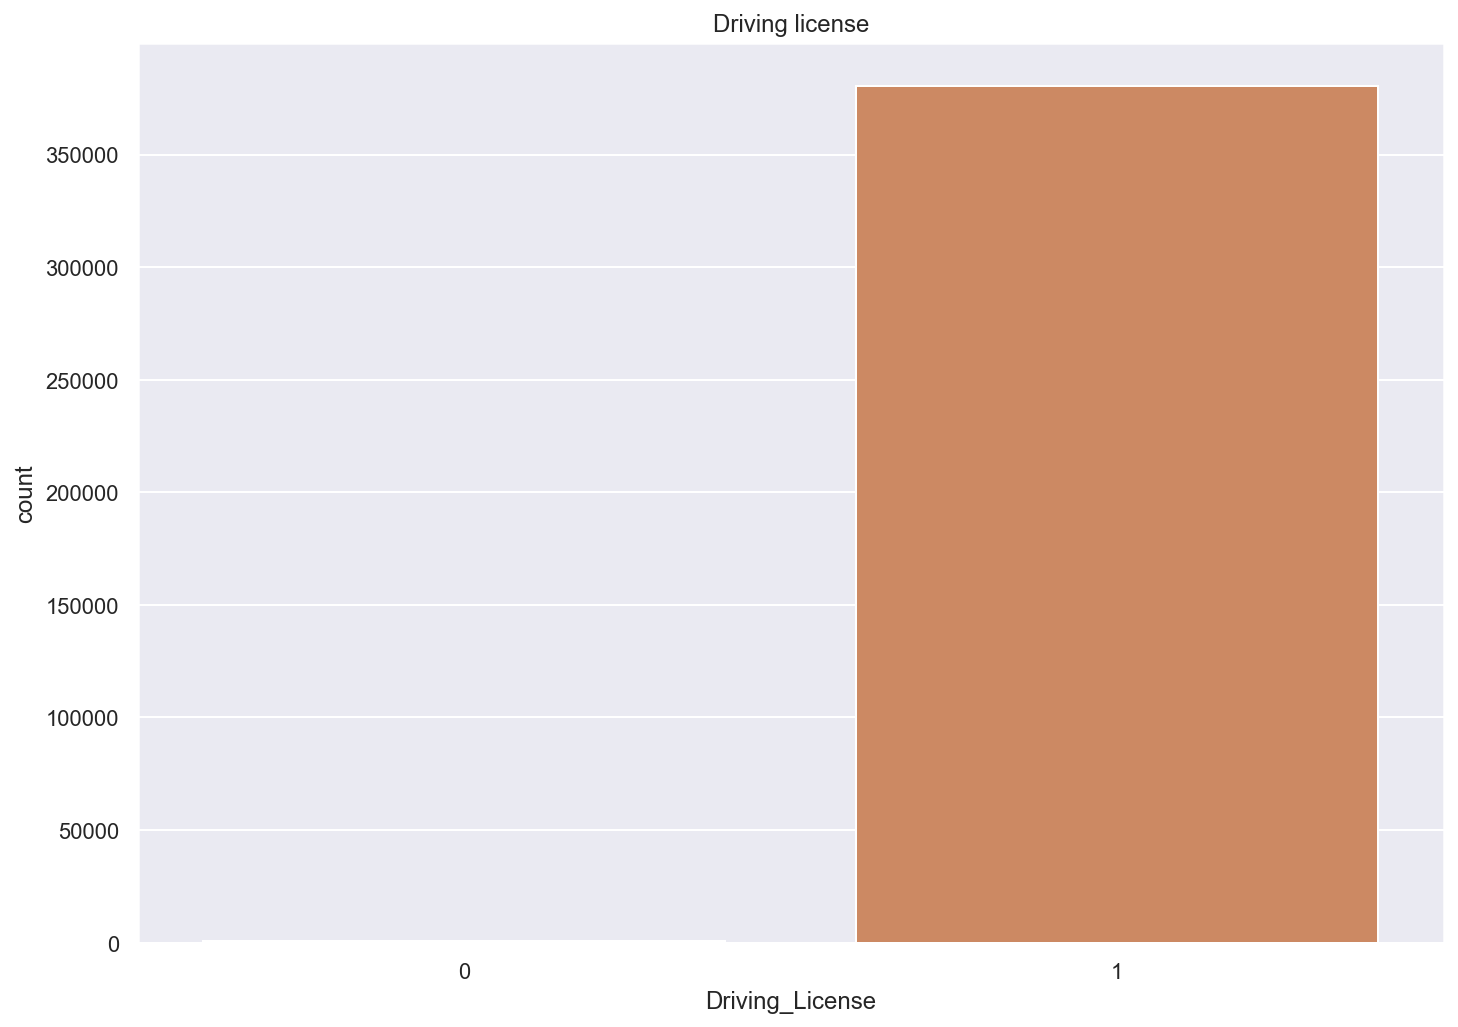

In [124]:
#Checking  Driving_License count
sns.countplot(train_df.Driving_License)
train_df.Driving_License.value_counts()
plt.title("Driving license")#title of graph
plt.show()#show graph

So when I ran this looks like everyone has a driver license BUT take a look at the count of numbers that do not have license 
its 812. I wonder if people will say yes or no based on having a license.

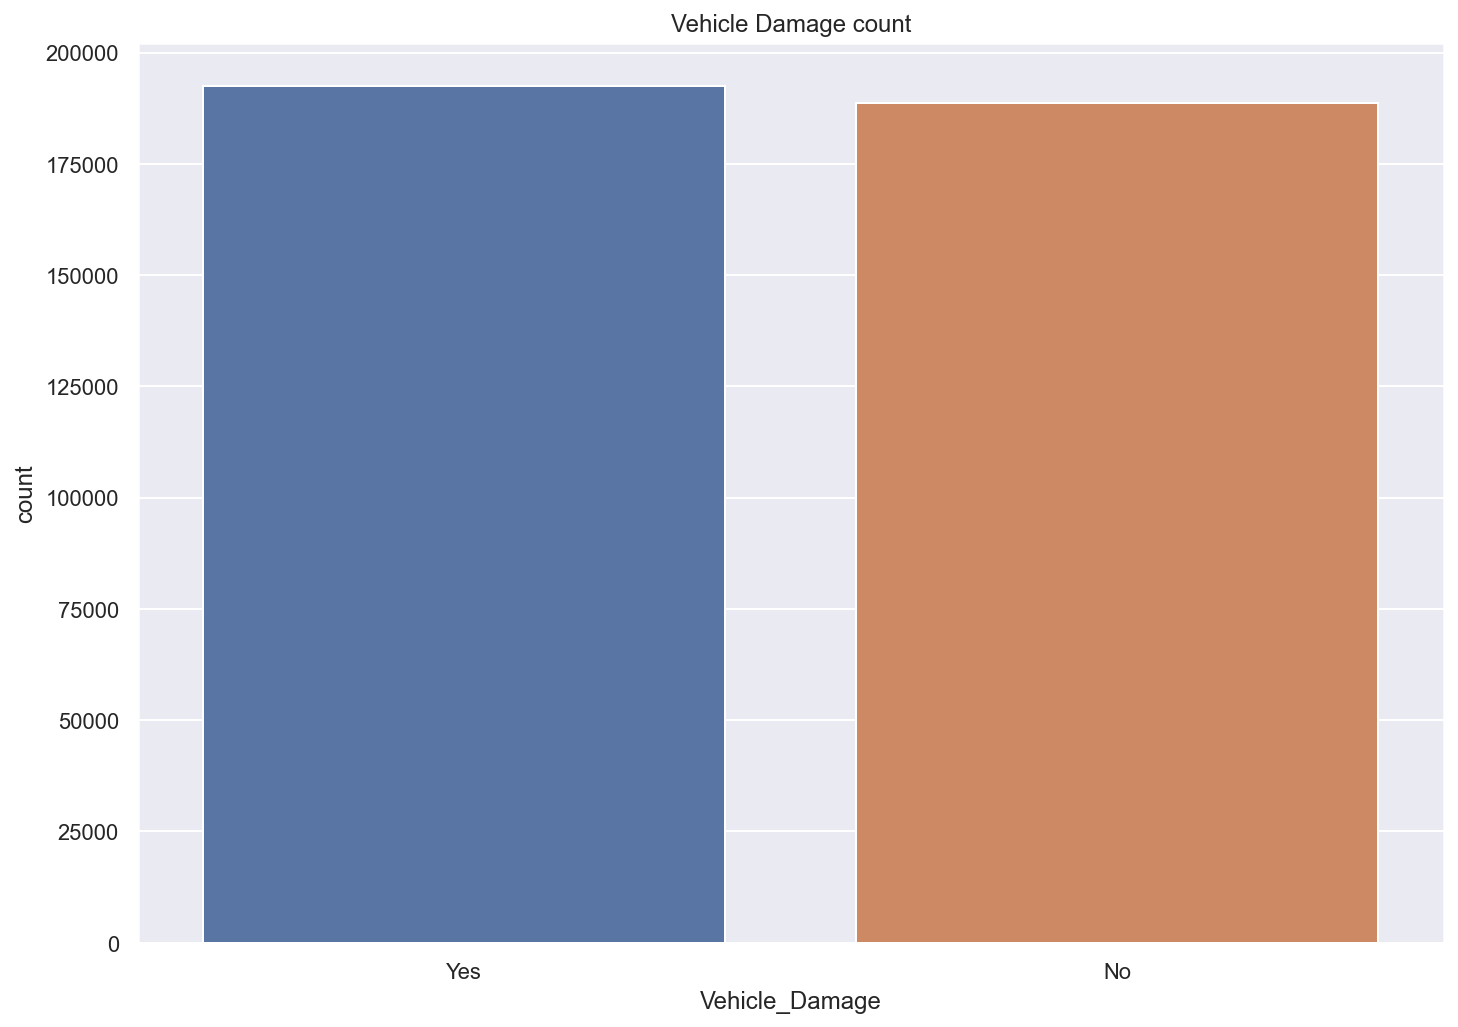

In [125]:
#Checking  Vehicle_Damage count
sns.countplot(train_df.Vehicle_Damage)
train_df.Vehicle_Damage.value_counts()
plt.title("Vehicle Damage count")#title of graph
plt.show()#show graph

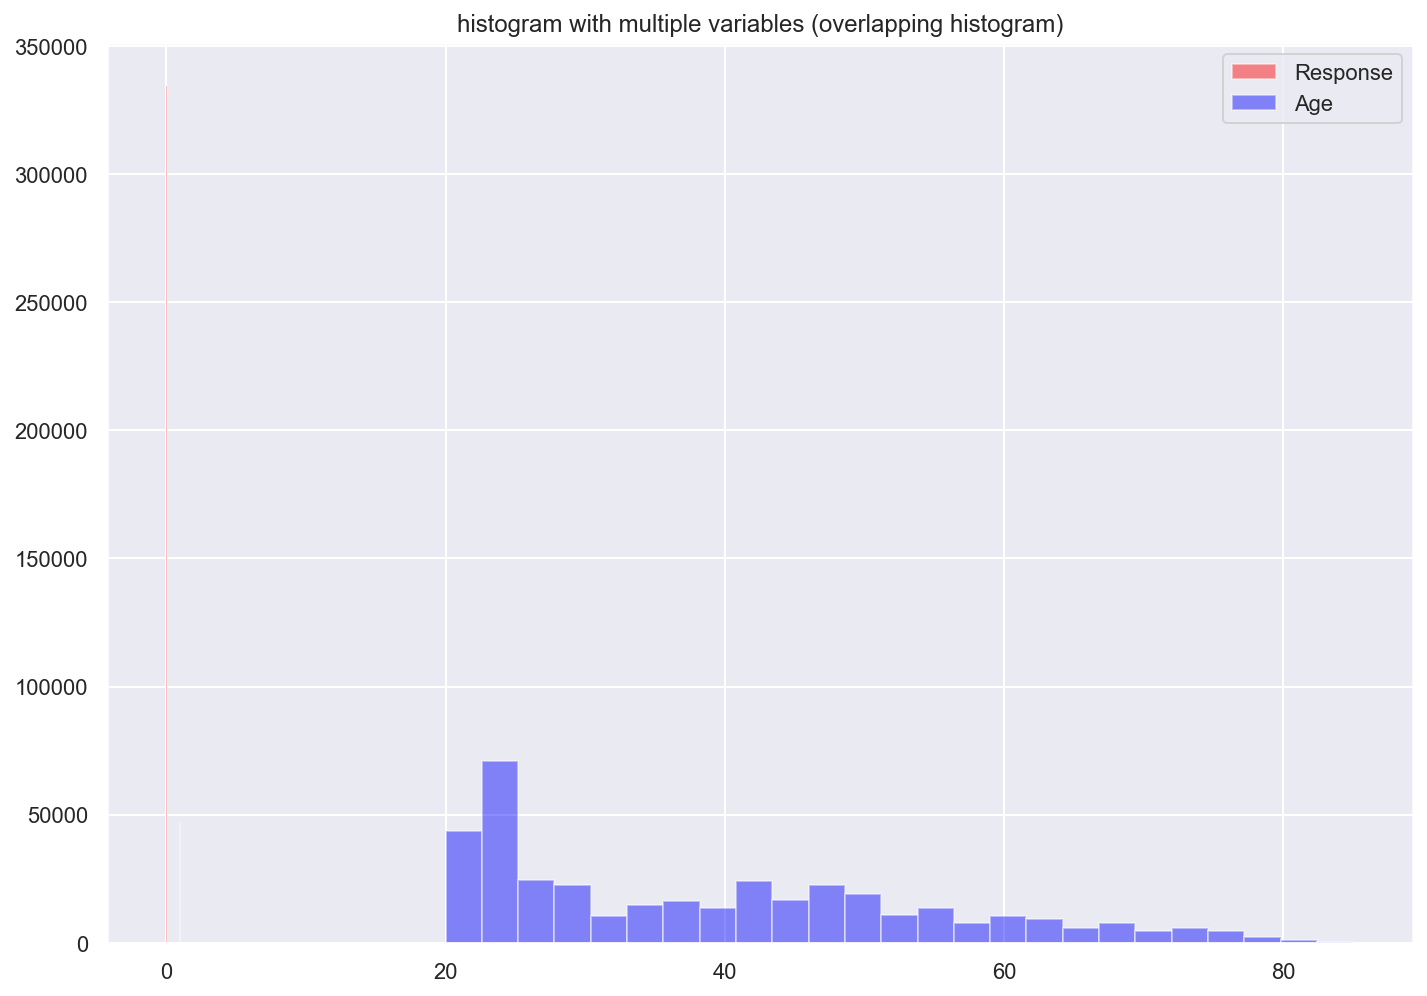

In [126]:
# plotting two histograms on the same axis
plt.hist(train_df['Response'], bins=25, alpha=0.45, color='red')
plt.hist(train_df['Age'], bins=25, alpha=0.45, color='blue')
  
plt.title("histogram with multiple \
variables (overlapping histogram)")
  
plt.legend(['Response', 
            'Age'])
  
plt.show()

No columns showed high correlation.  Age and Policy Sales Channel showed high opposite correlation.

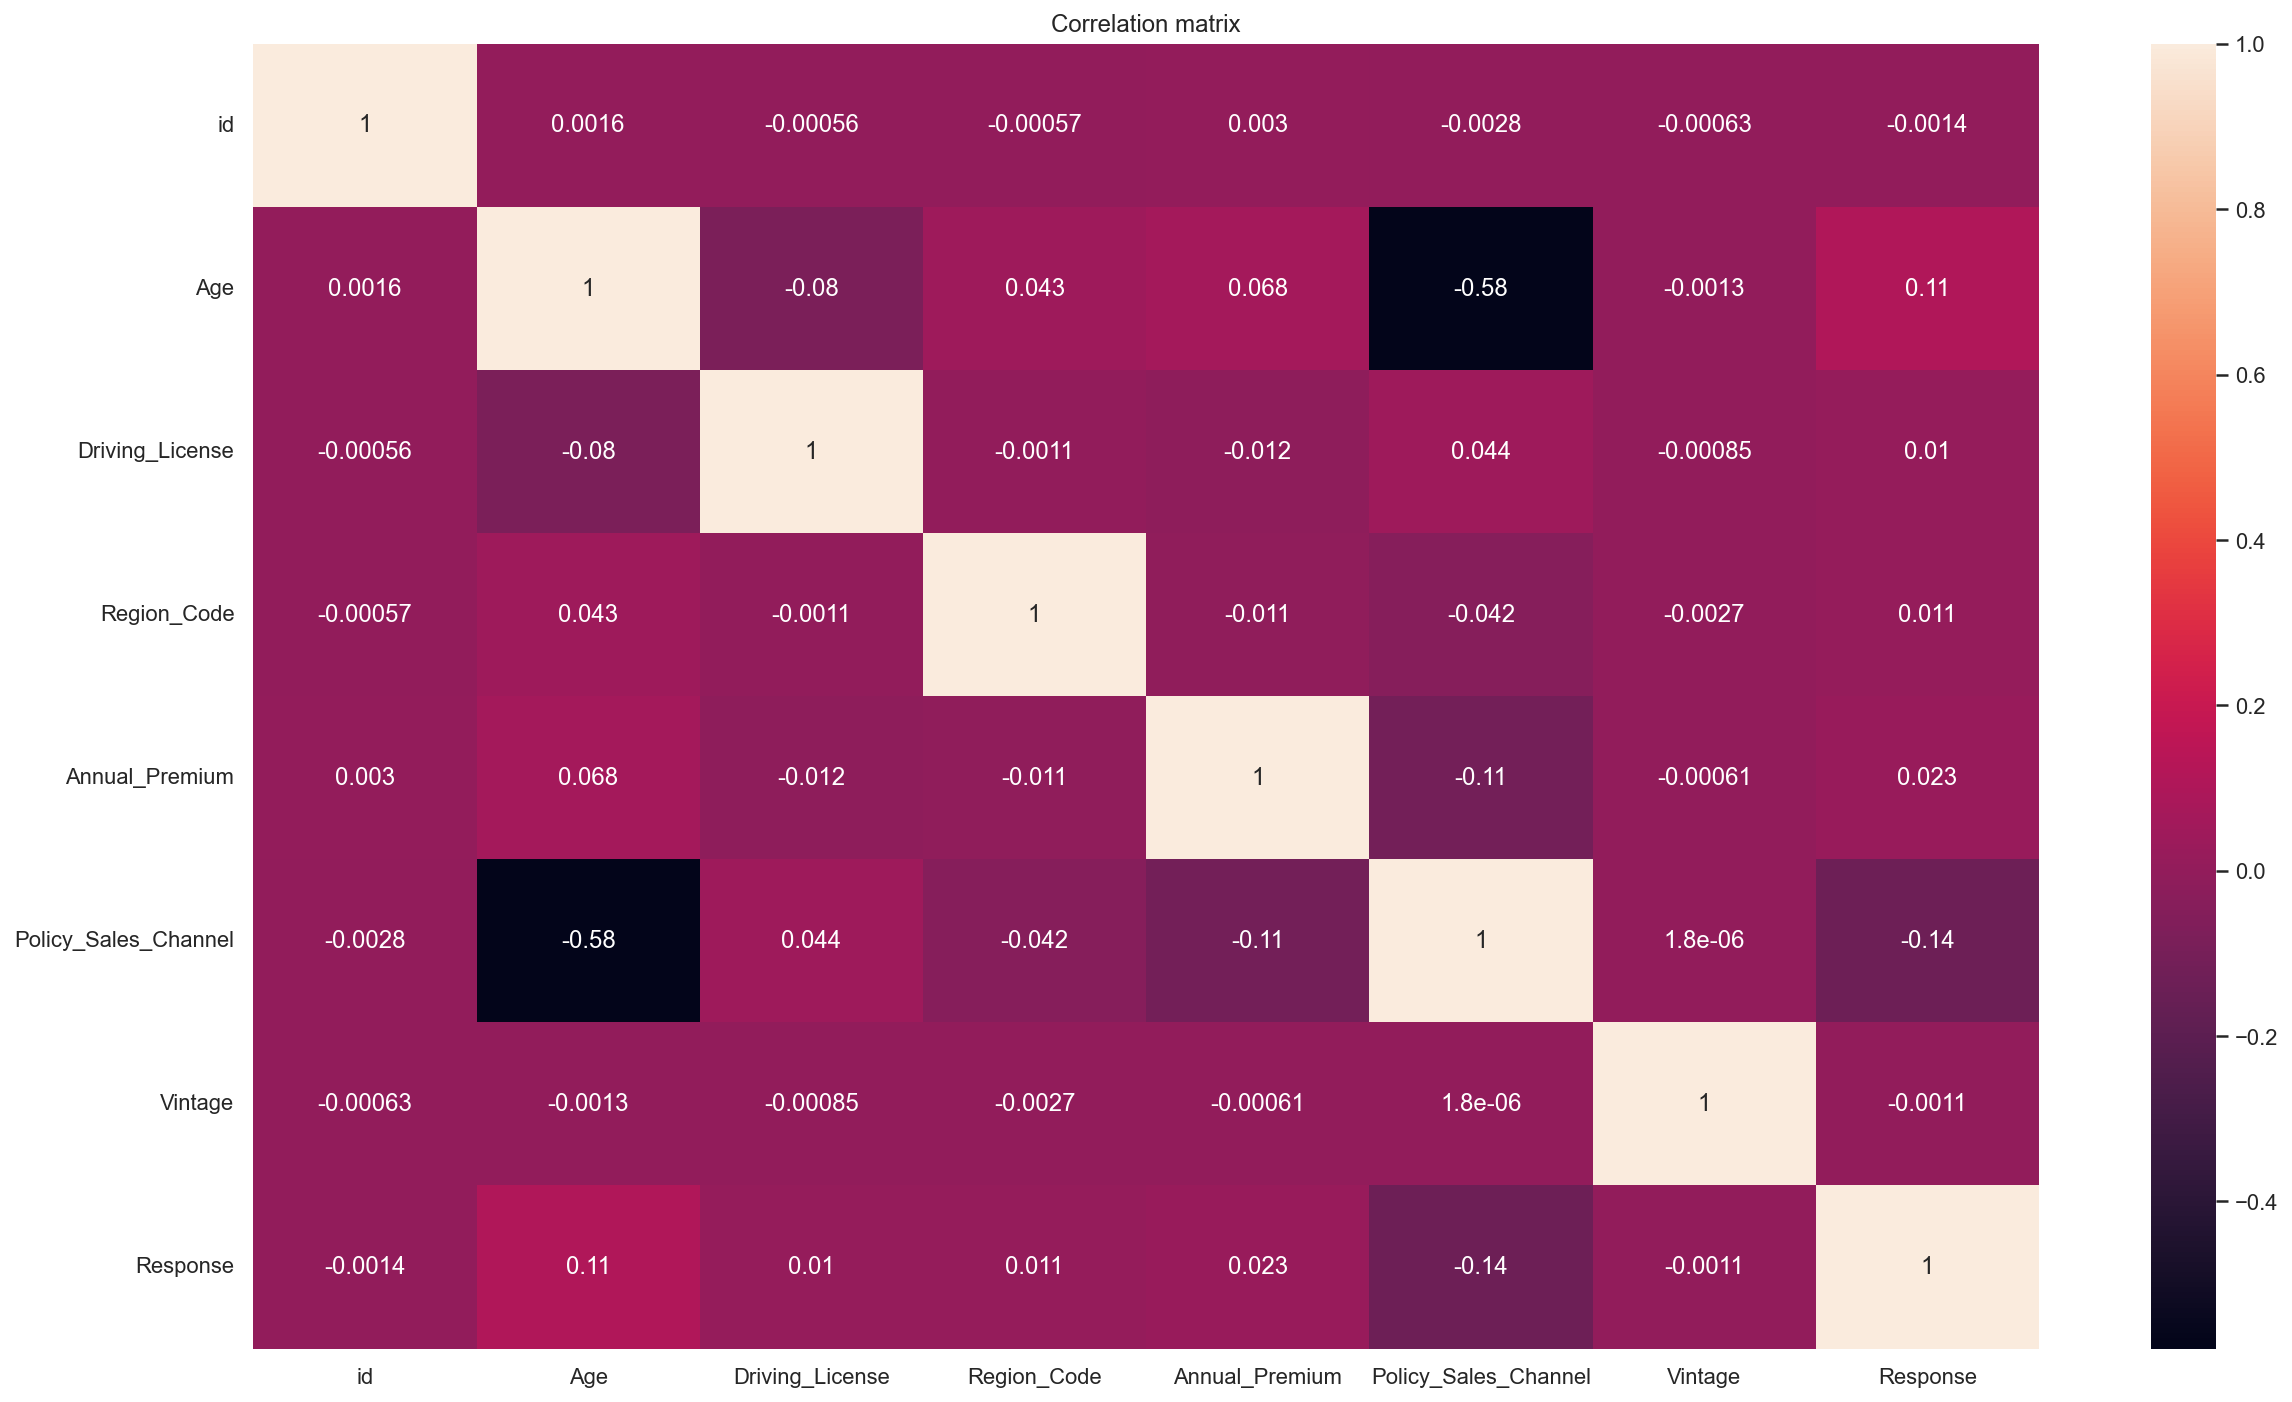

In [127]:
plt.figure(figsize=(20, 12))
sns.heatmap(train_df.corr(), annot=True)
plt.title("Correlation matrix")#title of graph
plt.show()#show graph

# Feature engineering

In [128]:
train_df.dropna(inplace=True)

In [129]:
train_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


We have labeled the columns of vehicle damage to 1 and 0. 1 represents vehicle damage and 0 represents no damage.

In [130]:
train_df['Vehicle_Damage'] = np.where(train_df['Vehicle_Damage']=='Yes', 1, 0)

We have created buckets for vehicle age and labled it, if a vehicle age is less then 1 year = 1. And if the vehicle age is between 1 and 2 year = 2. And if the vehicle age is greather then 2 = 3.

In [131]:
col         = 'Vehicle_Age'
conditions  = [train_df[col] == '< 1 Year', train_df[col] == '1-2 Year', train_df[col] == '> 2 Years']
choices     = [1, 2, 3]
    
train_df['Vehicle_Age'] = np.select(conditions, choices, default=0)

Below we're resizeing the distribution of values for thesse columns 'Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'. So that our mean of the observed values will be zero. 

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']:
    train_df[col] =  scaler.fit_transform(np.array(train_df[col]).reshape(-1, 1))

Handling Skewnessand tranforming outliers & resampling 

<AxesSubplot:xlabel='Annual_Premium'>

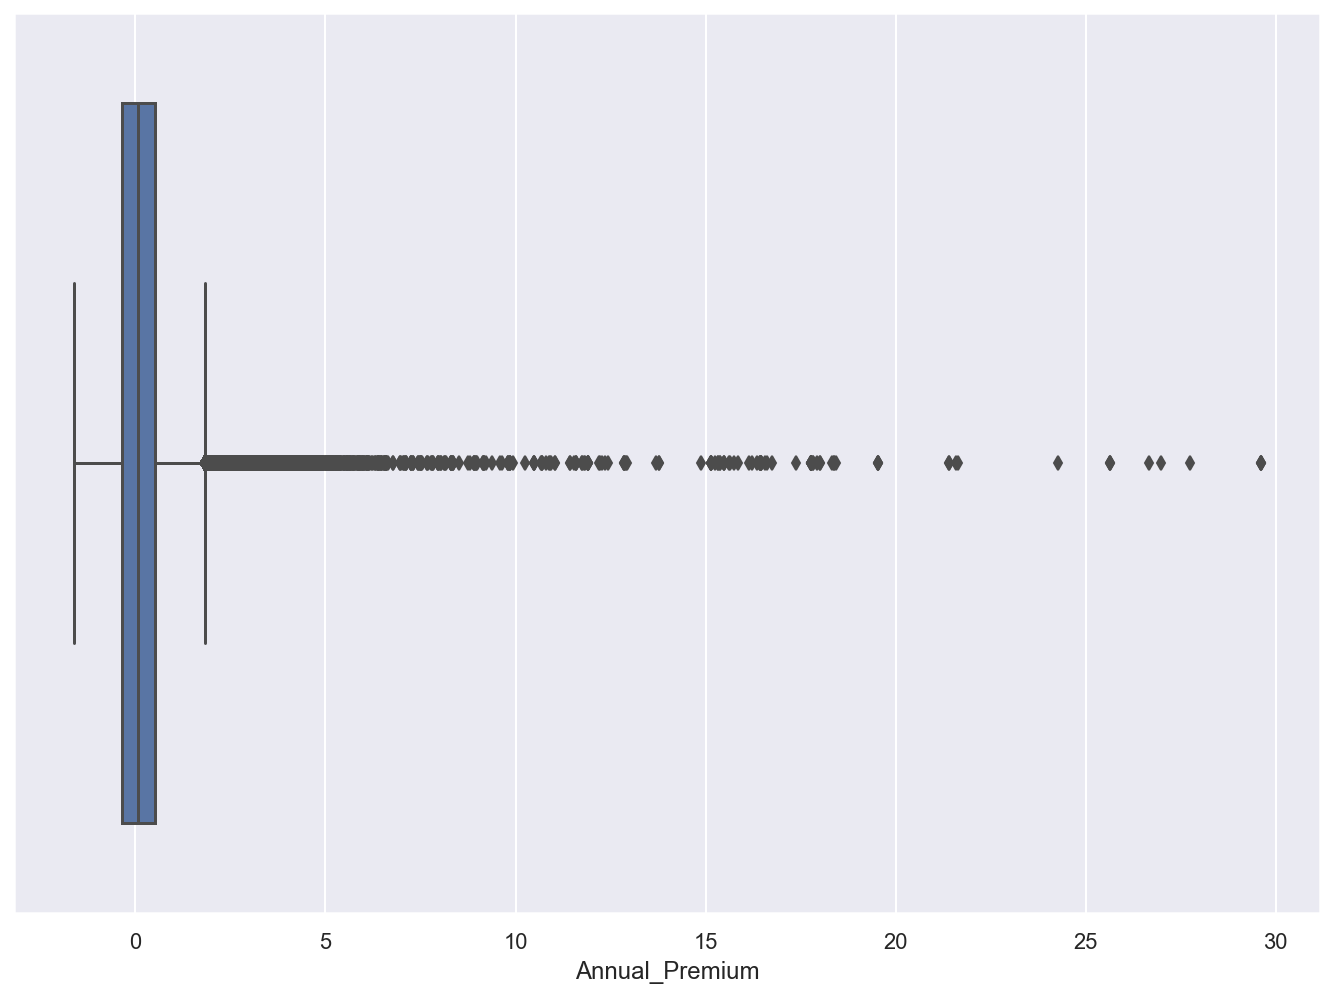

In [133]:
sns.boxplot(train_df['Annual_Premium'])

<AxesSubplot:xlabel='Annual_Premium'>

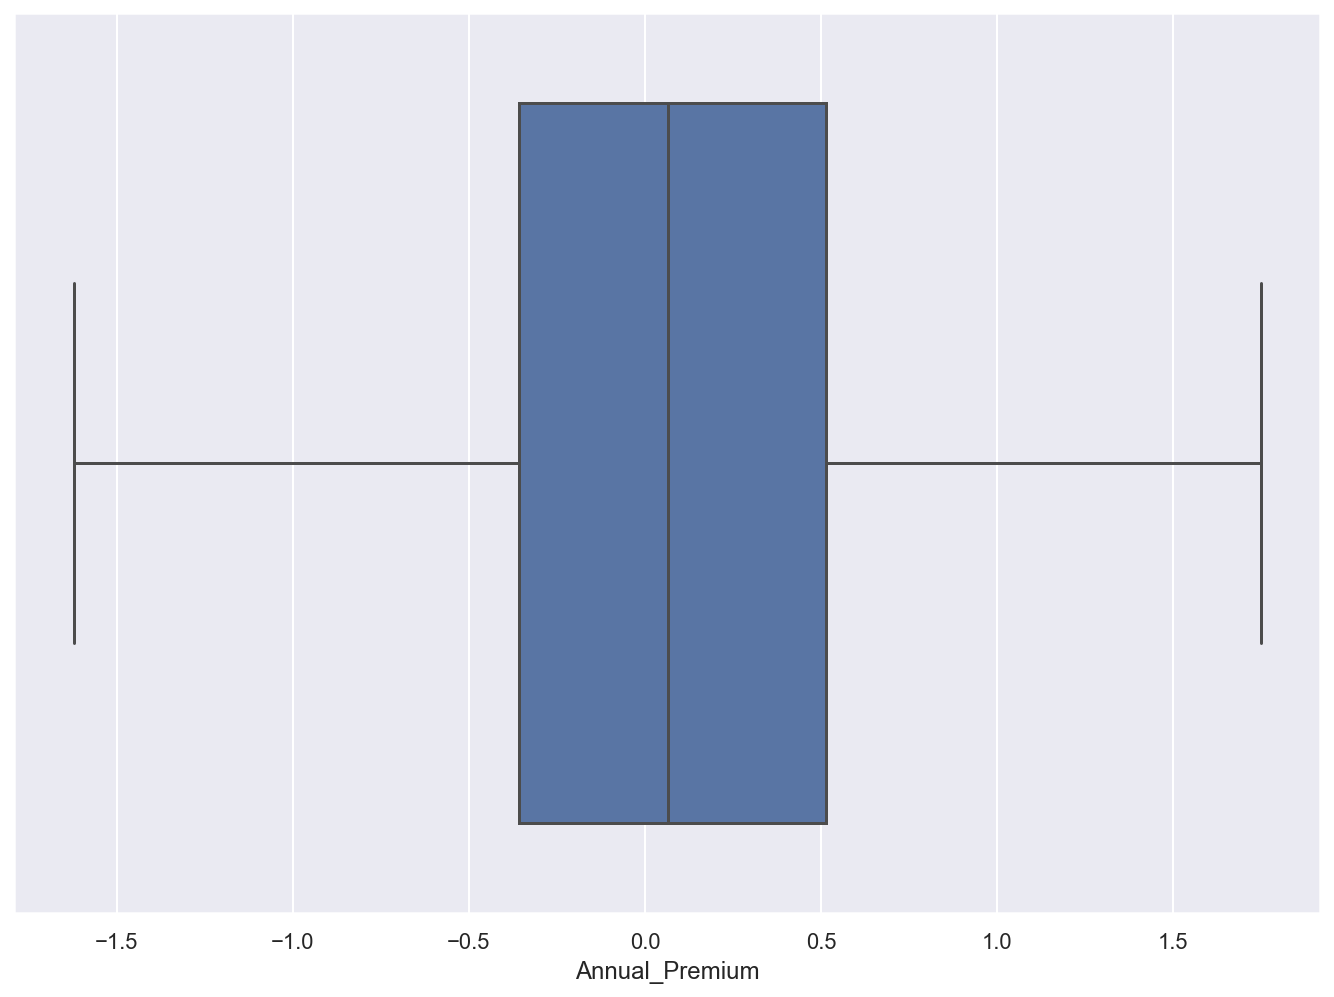

In [134]:
train_df['Annual_Premium'] = winsorize(train_df['Annual_Premium'], (0.01, 0.03))
test_df['Annual_Premium'] = winsorize(test_df['Annual_Premium'], (0.01, 0.03))

sns.boxplot(train_df['Annual_Premium'])

<AxesSubplot:>

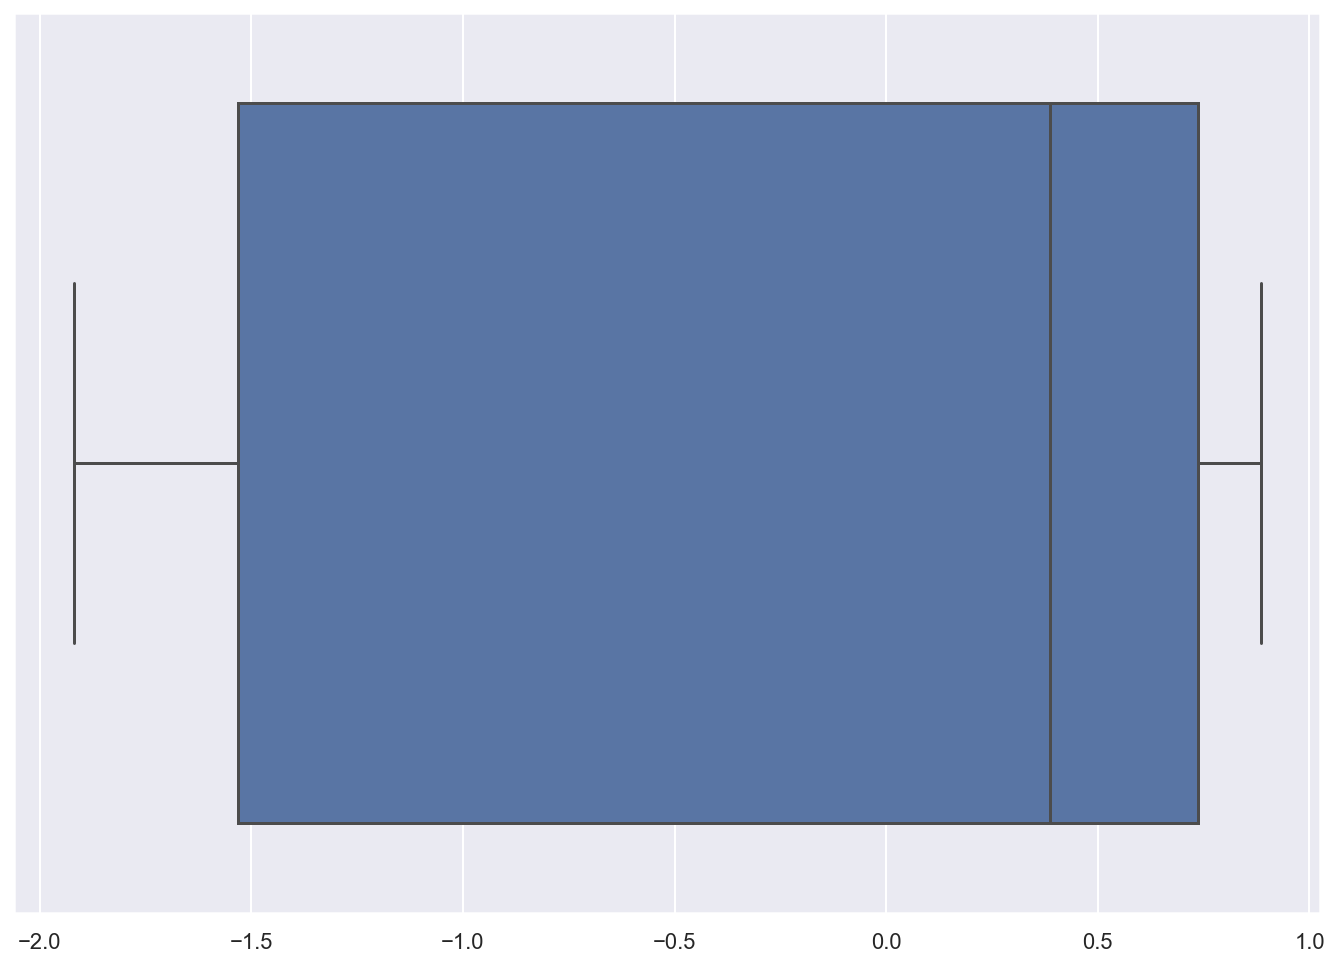

In [135]:
sns.boxplot(winsorize(train_df['Policy_Sales_Channel'], (0.01, 0.01)))

In [136]:
train_df['Policy_Sales_Channel'] = winsorize(train_df['Policy_Sales_Channel'], (0.01, 0.01))
test_df['Policy_Sales_Channel'] = winsorize(test_df['Policy_Sales_Channel'], (0.01, 0.01))

<AxesSubplot:>

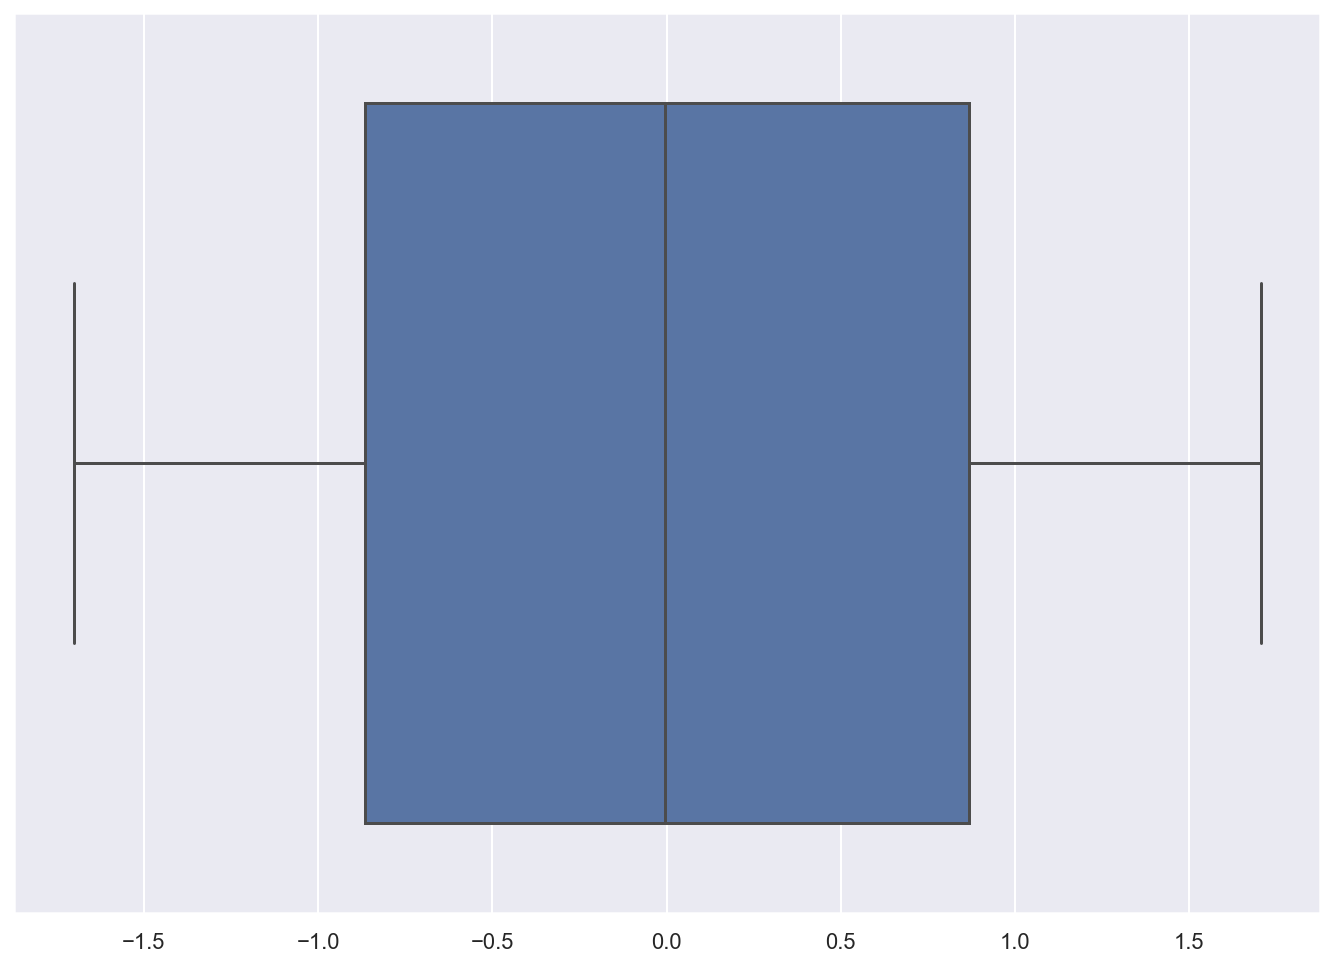

In [137]:
sns.boxplot(winsorize(train_df['Vintage'], (0.01, 0.01)))

In [138]:
train_df['Vintage'] = winsorize(train_df['Vintage'], (0.01, 0.01))
test_df['Vintage'] = winsorize(test_df['Vintage'], (0.01, 0.01))

# Model Selection